In [1]:
!pwd

/home/campbell/yulee/DAMM/new/code


In [4]:
import glob
from PIL import Image
from IPython import display

In [2]:
import numpy as np
np.log10(100)

2.0

In [5]:
## for basel
fns1 = glob.glob('/home/campbell/yulee/DAMM/new/res/basel/10k/damm/plot/theta0*student*_rv100_*0_clus_s.png')
fns2 = glob.glob('/home/campbell/yulee/DAMM/new/res/basel/10k/damm/plot/theta1*student*_rv100_*0_clus_s.png')

fns3 = glob.glob('/home/campbell/yulee/DAMM/new/res/basel/10k/damm/plot/theta0*student*_rv100_*0_clus_as.png')
fns4 = glob.glob('/home/campbell/yulee/DAMM/new/res/basel/10k/damm/plot/theta1*student*_rv100_*0_clus_as.png')

#fns5 = glob.glob('/home/campbell/yulee/DAMM/new/res/basel/10k/damm/plot/theta0*student*0_clus_cellsize.png')
fns6 = glob.glob('/home/campbell/yulee/DAMM/new/res/basel/10k/damm/plot/theta1*student*_rv100_*0_clus_cellsize.png')

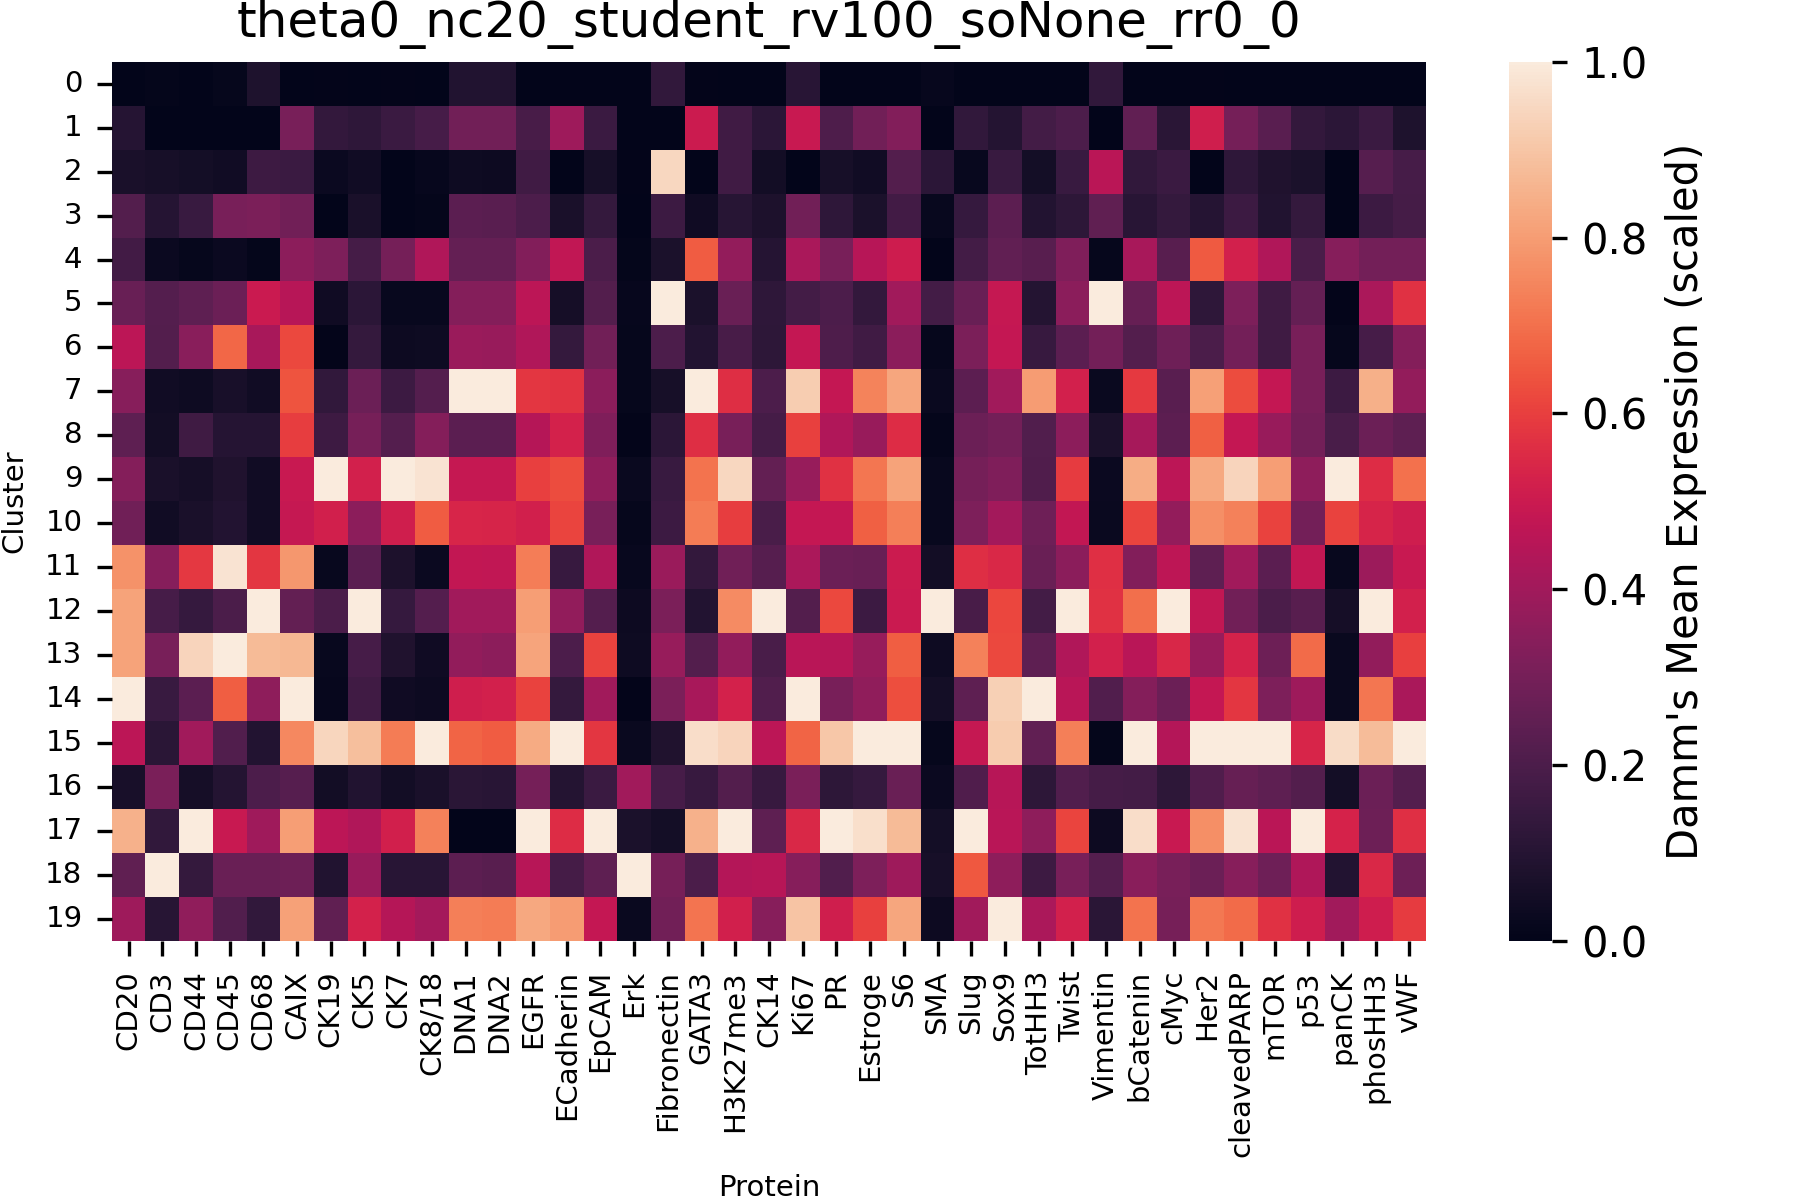

In [6]:
## kmeans
for fn in fns1:
    im = Image.open(fn)
    im.show()

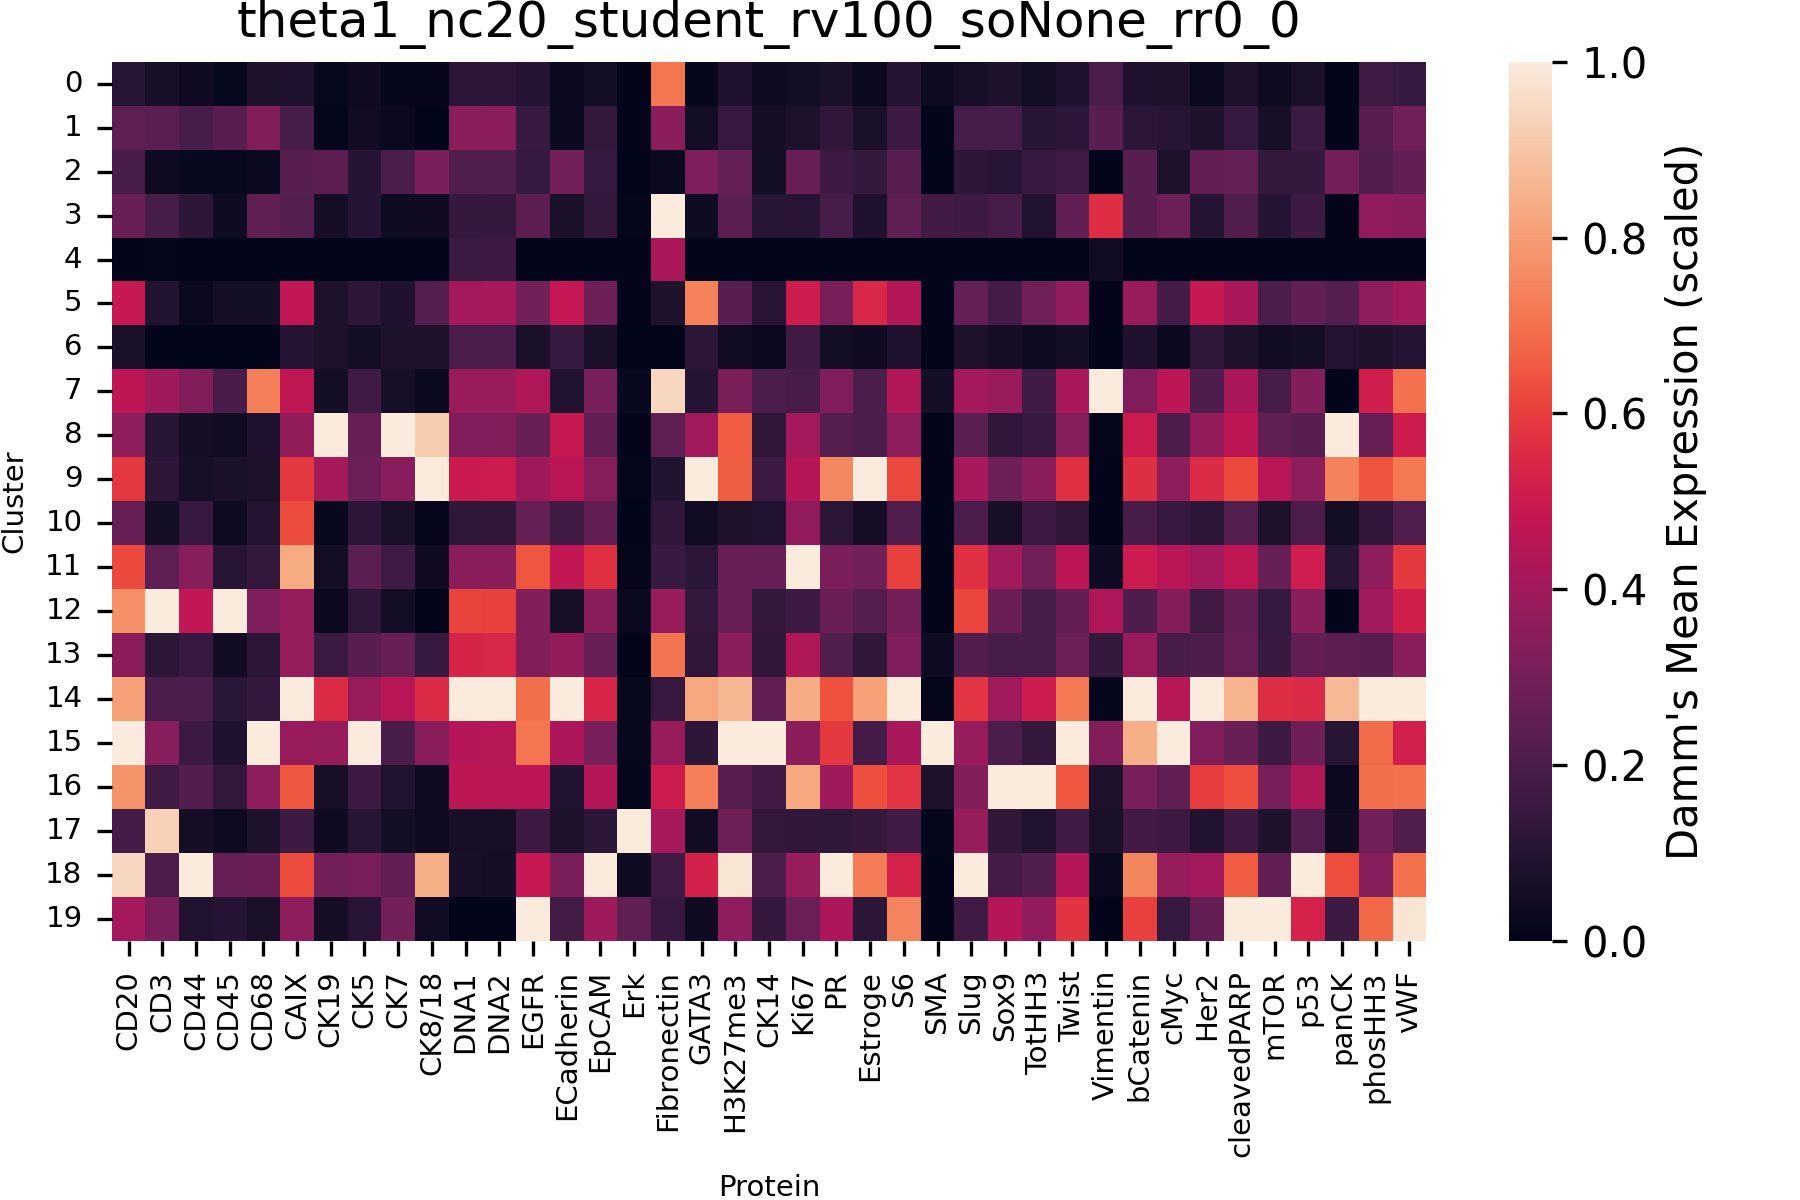

In [7]:
## damm
for fn in fns2:
    im = Image.open(fn)
    im.show()

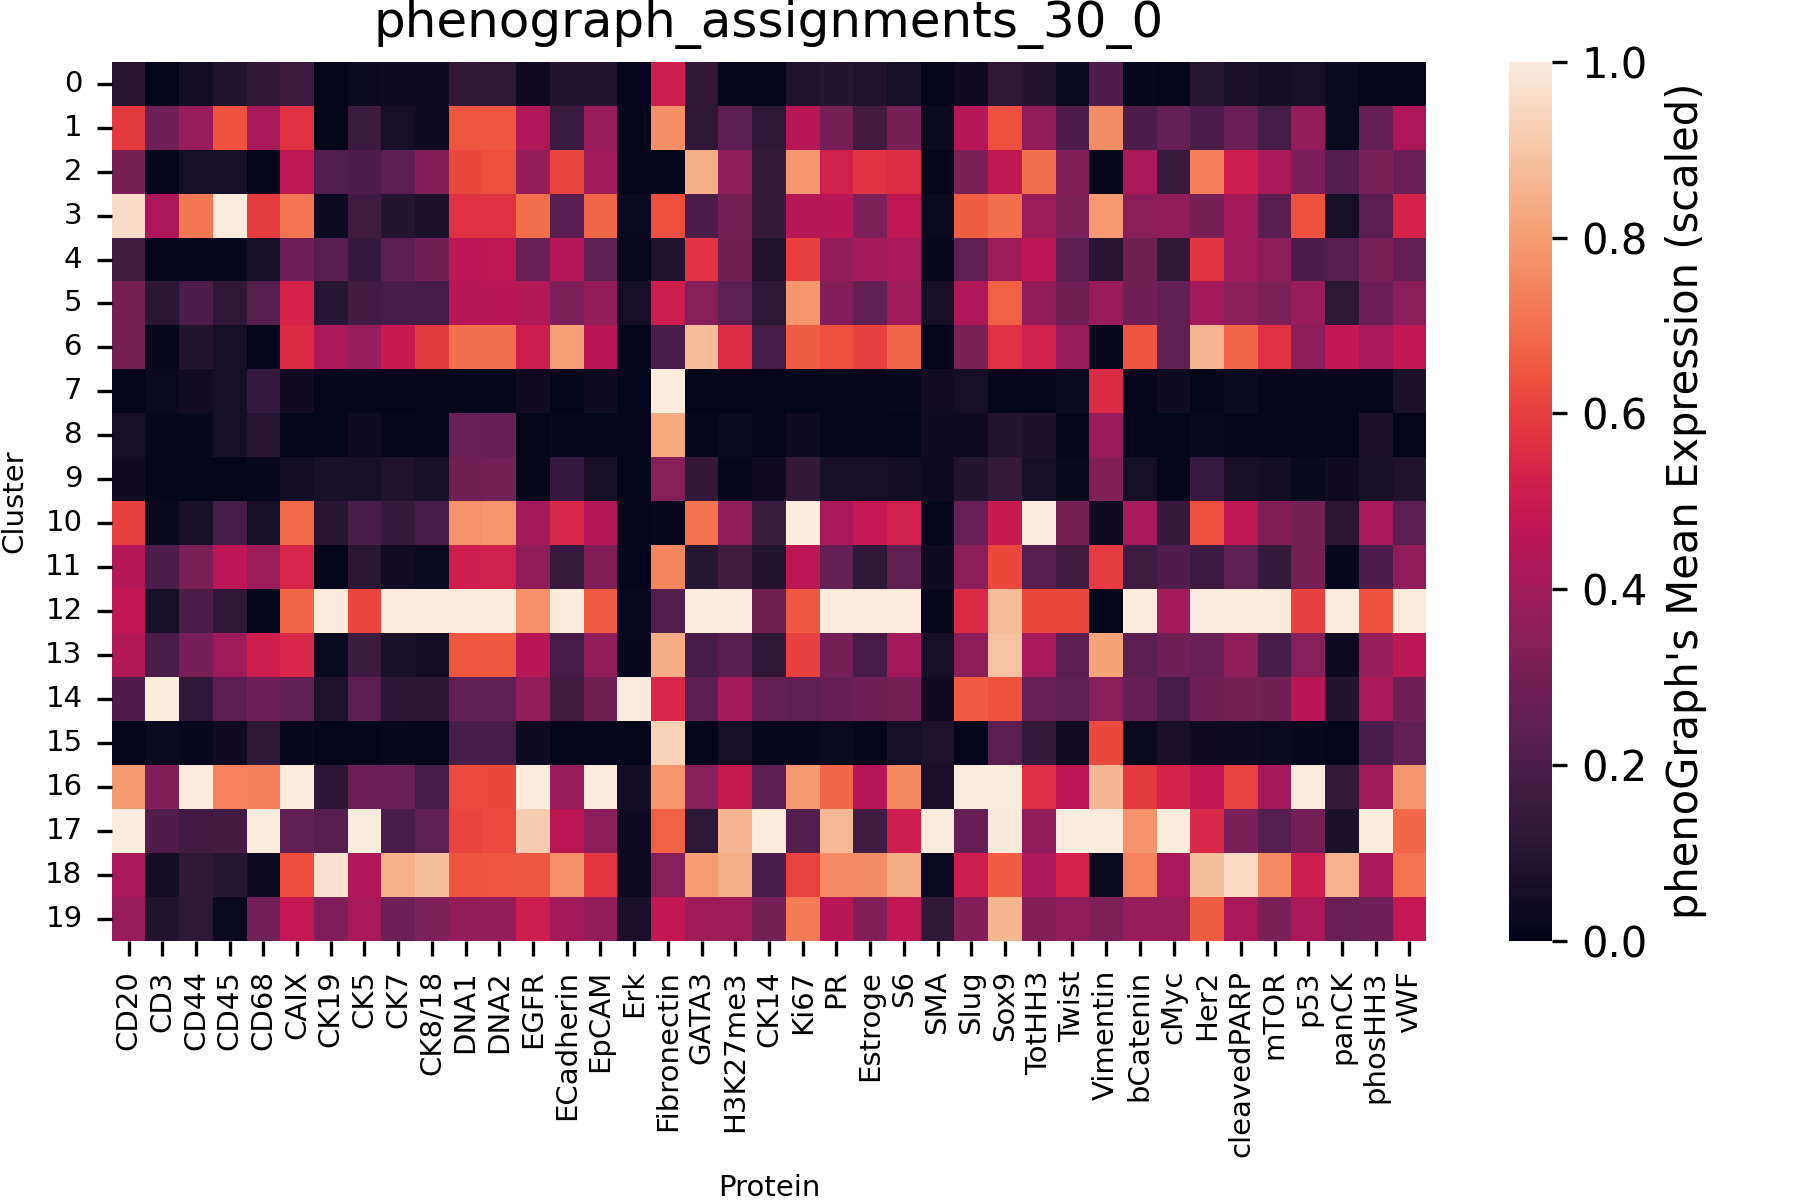

In [8]:
## phenograph
Image.open('/home/campbell/yulee/DAMM/new/res/basel/10k/pheno/plot/phenograph_assignments_30_0_clus_s.png').show()

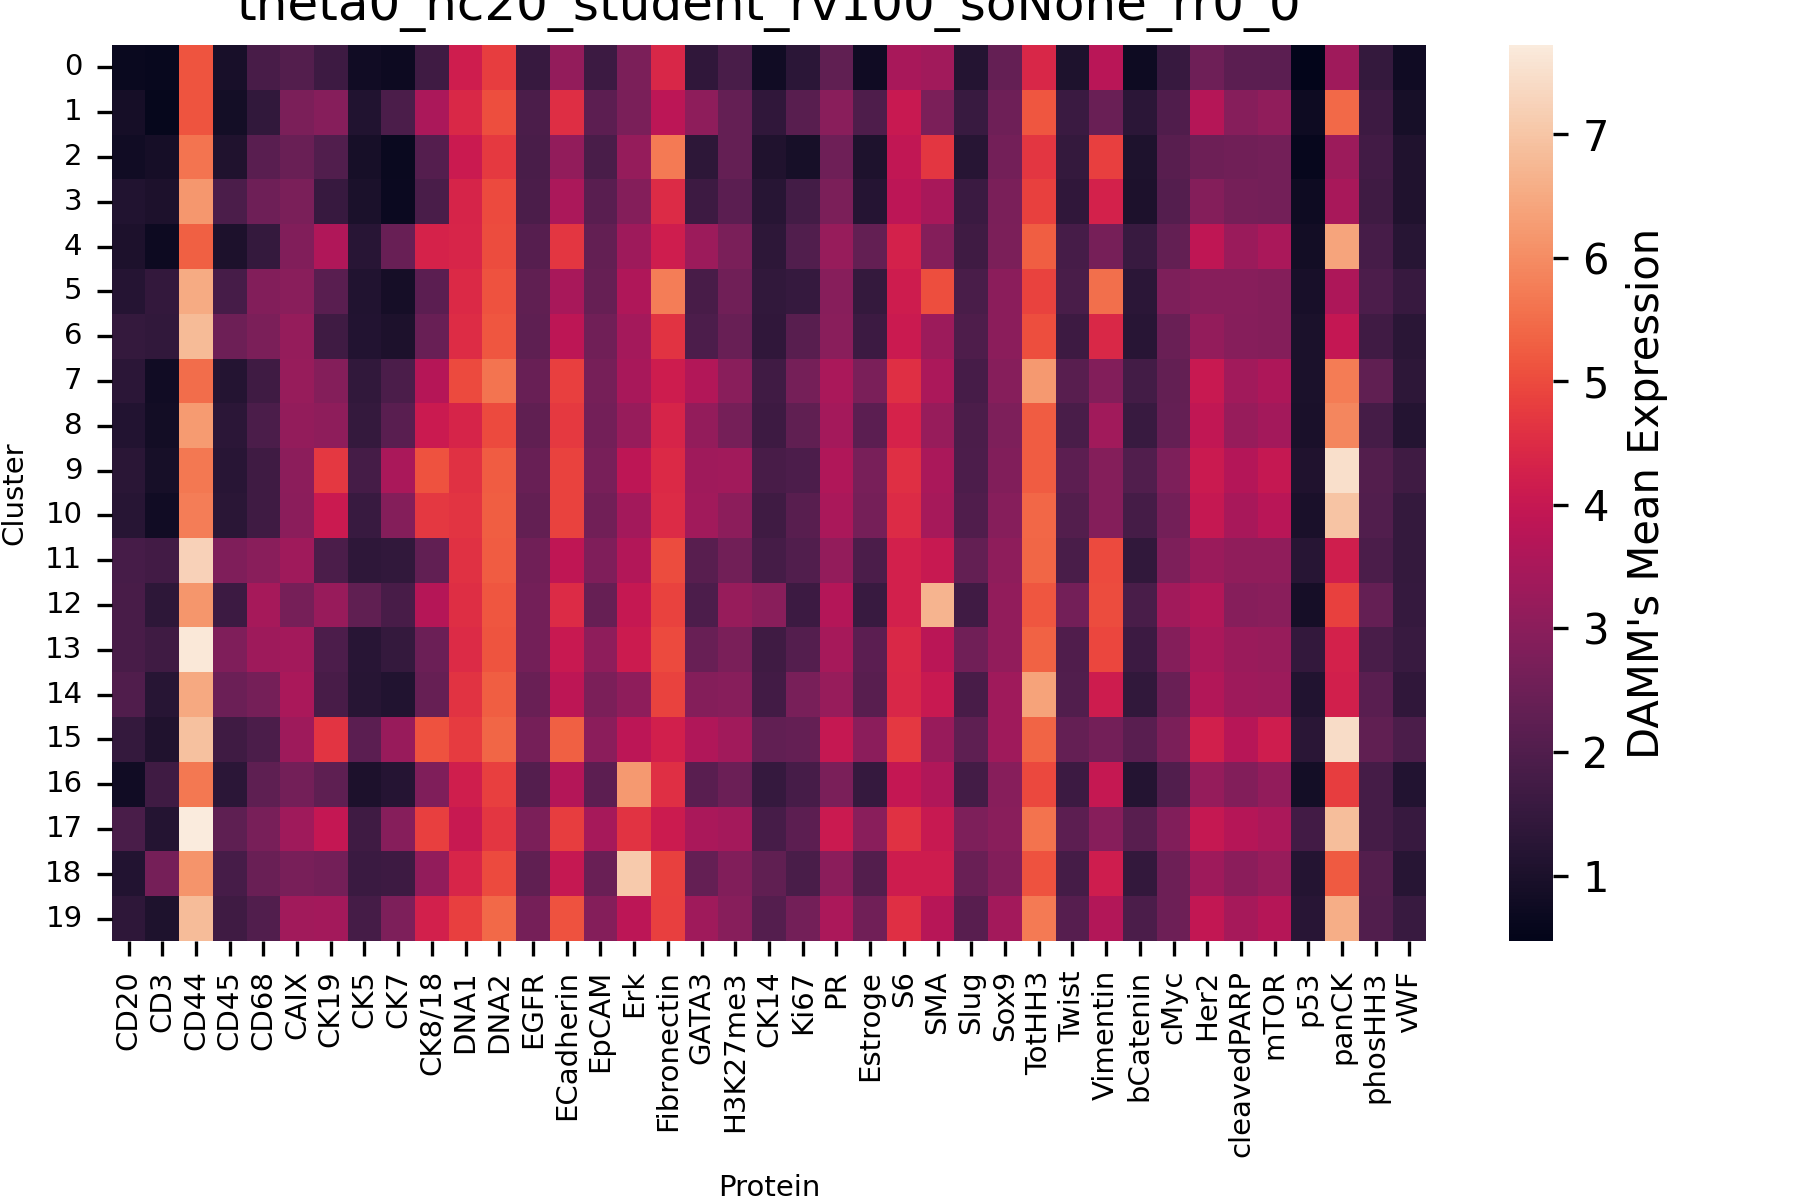

In [9]:
## kmeans arcsinh 0.1
for fn in fns3:
    im = Image.open(fn)
    im.show()

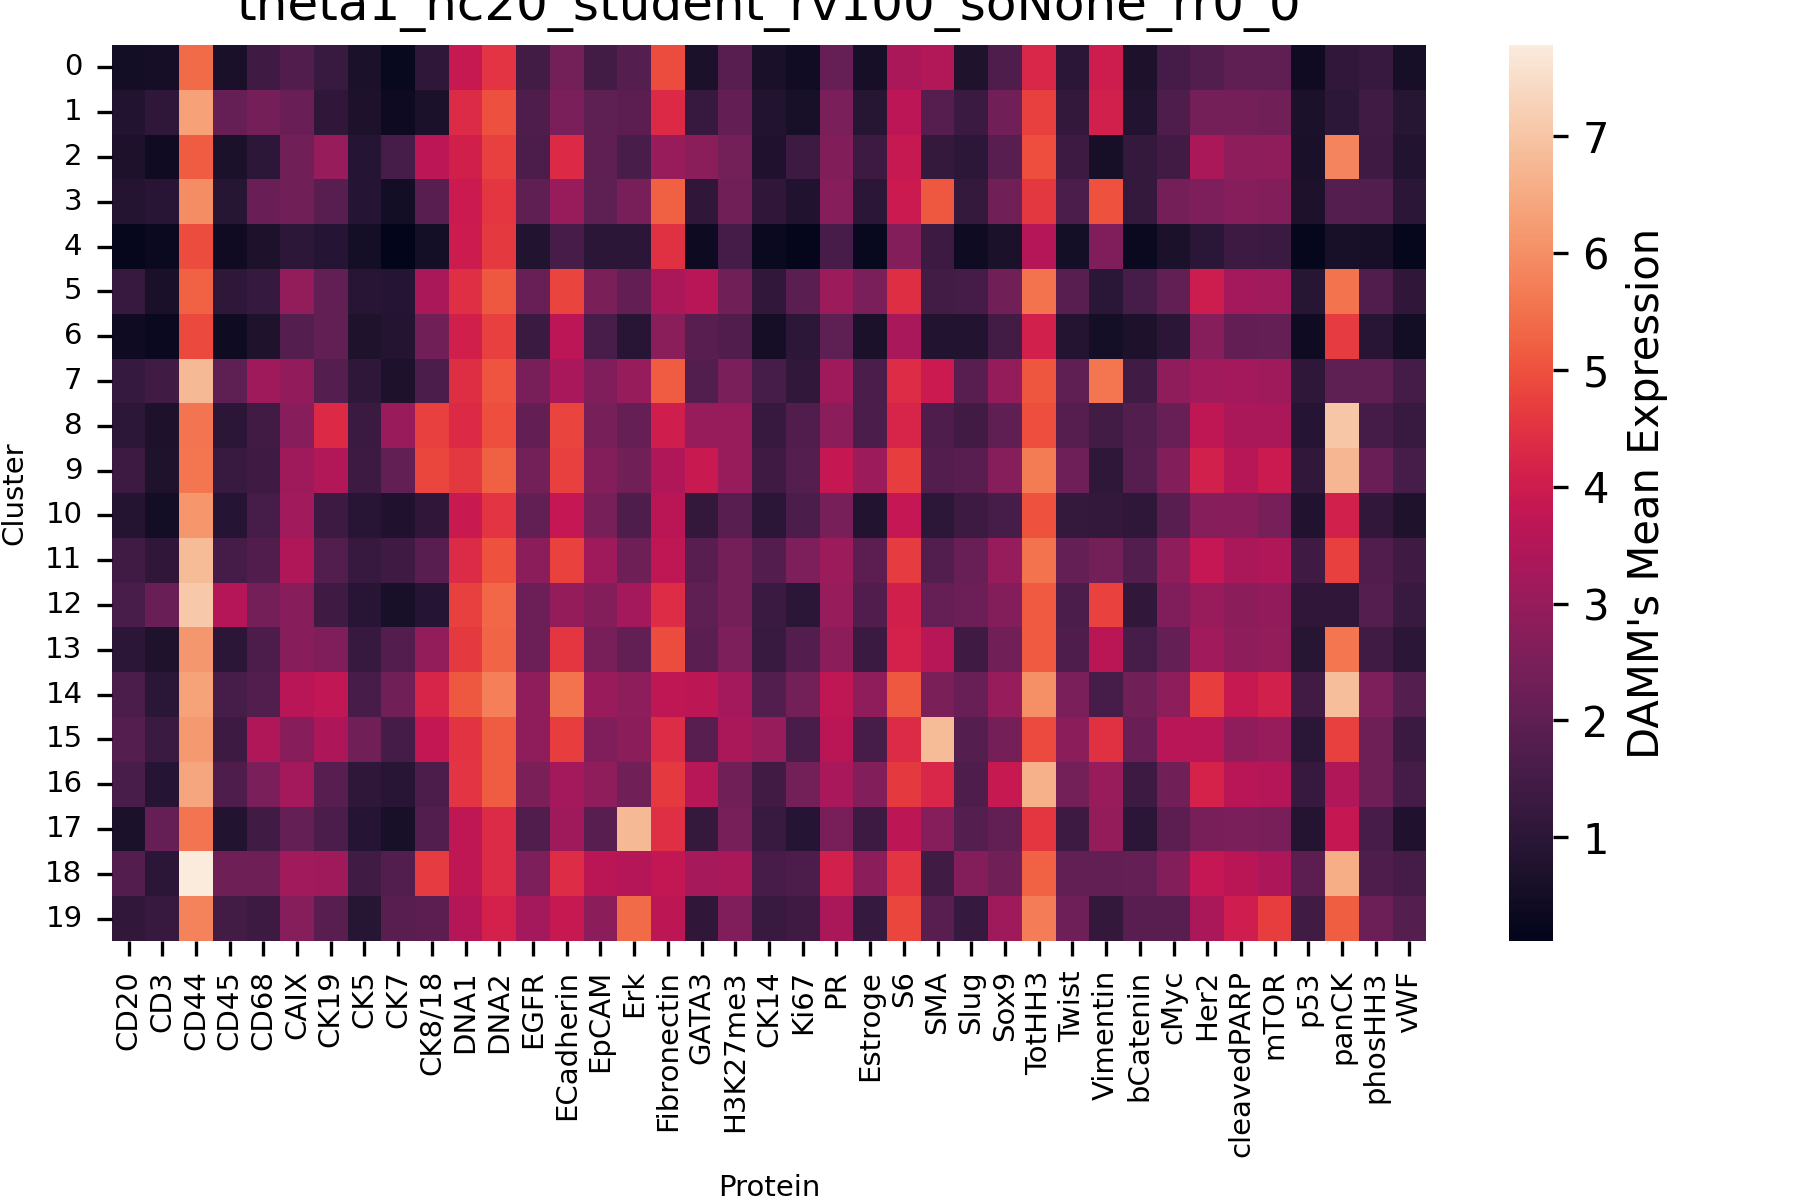

In [10]:
## damm arcsinh 0.1
for fn in fns4:
    im = Image.open(fn)
    im.show()

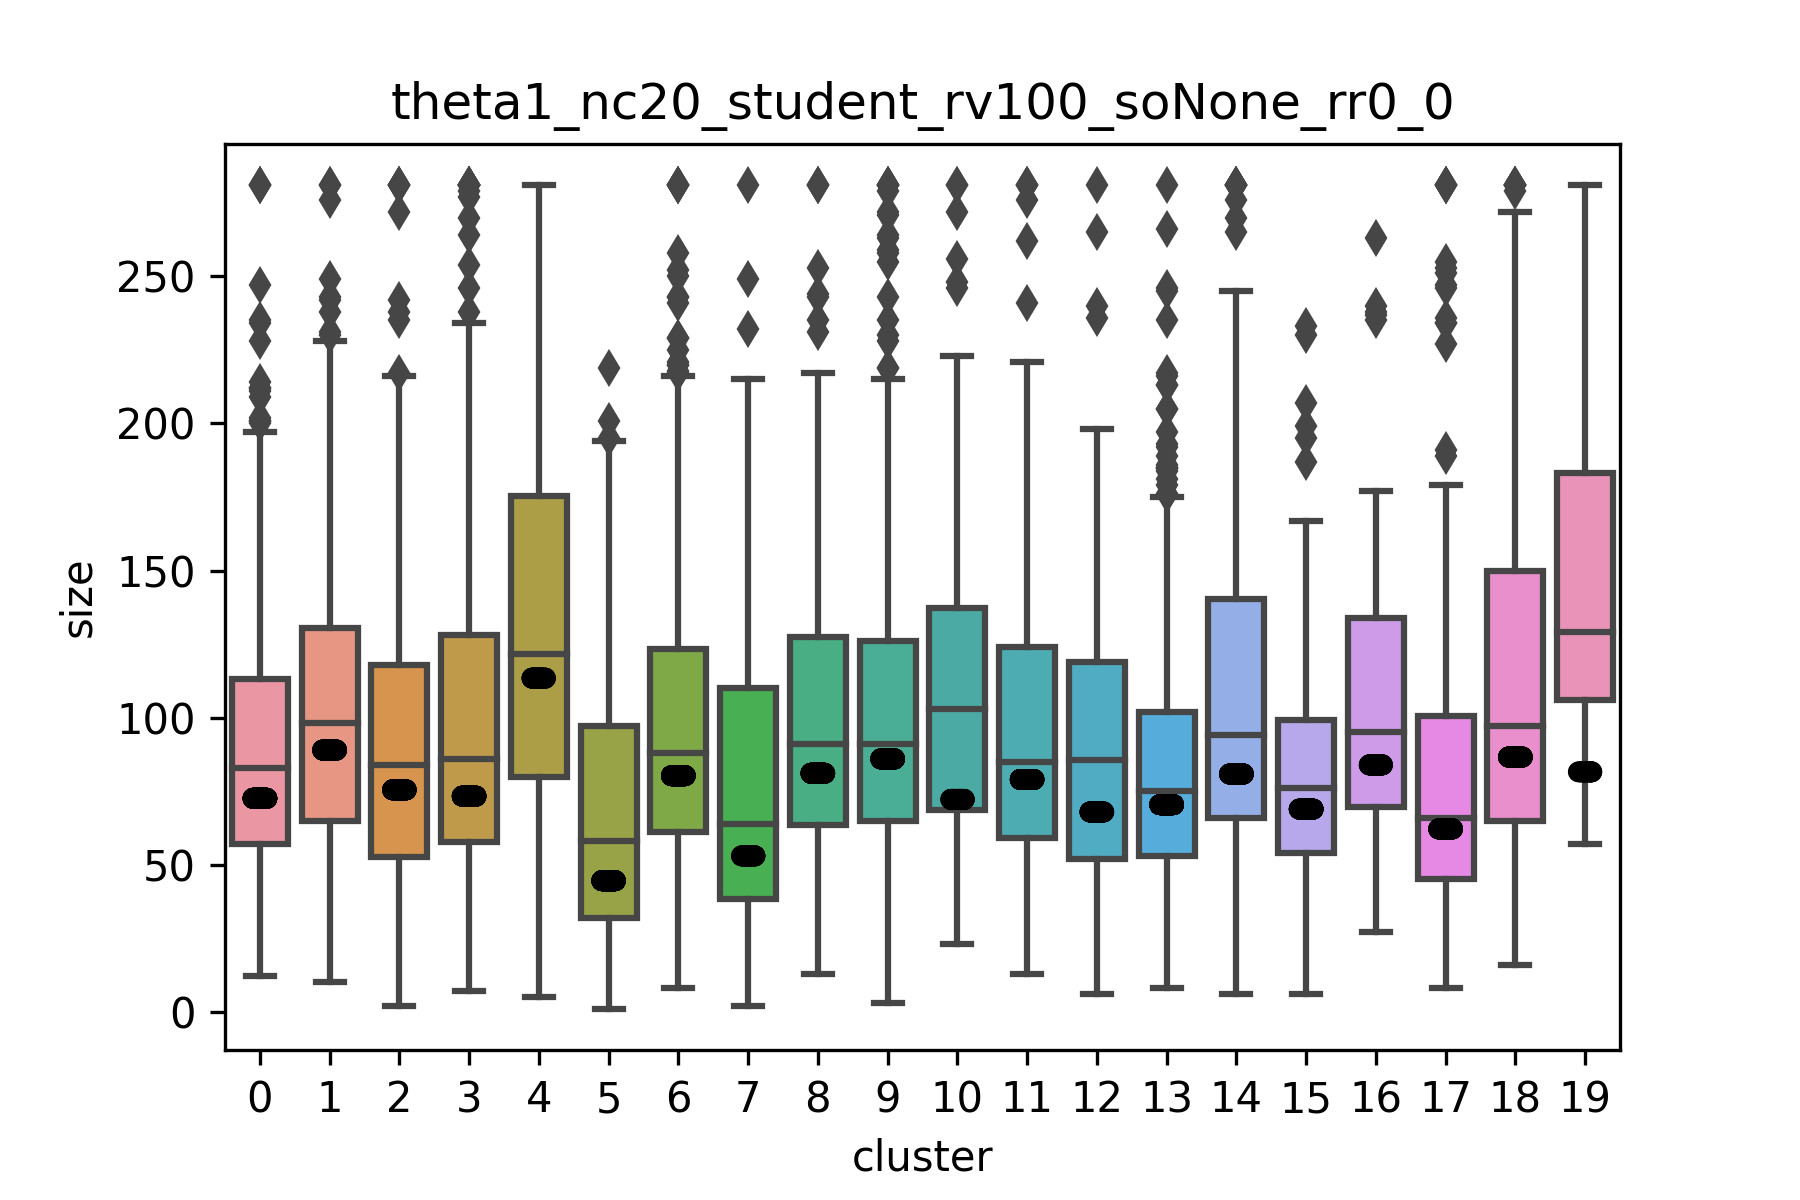

In [11]:
## damm correlation (phenograph black)
for fn in fns6:
    im = Image.open(fn)
    im.show()

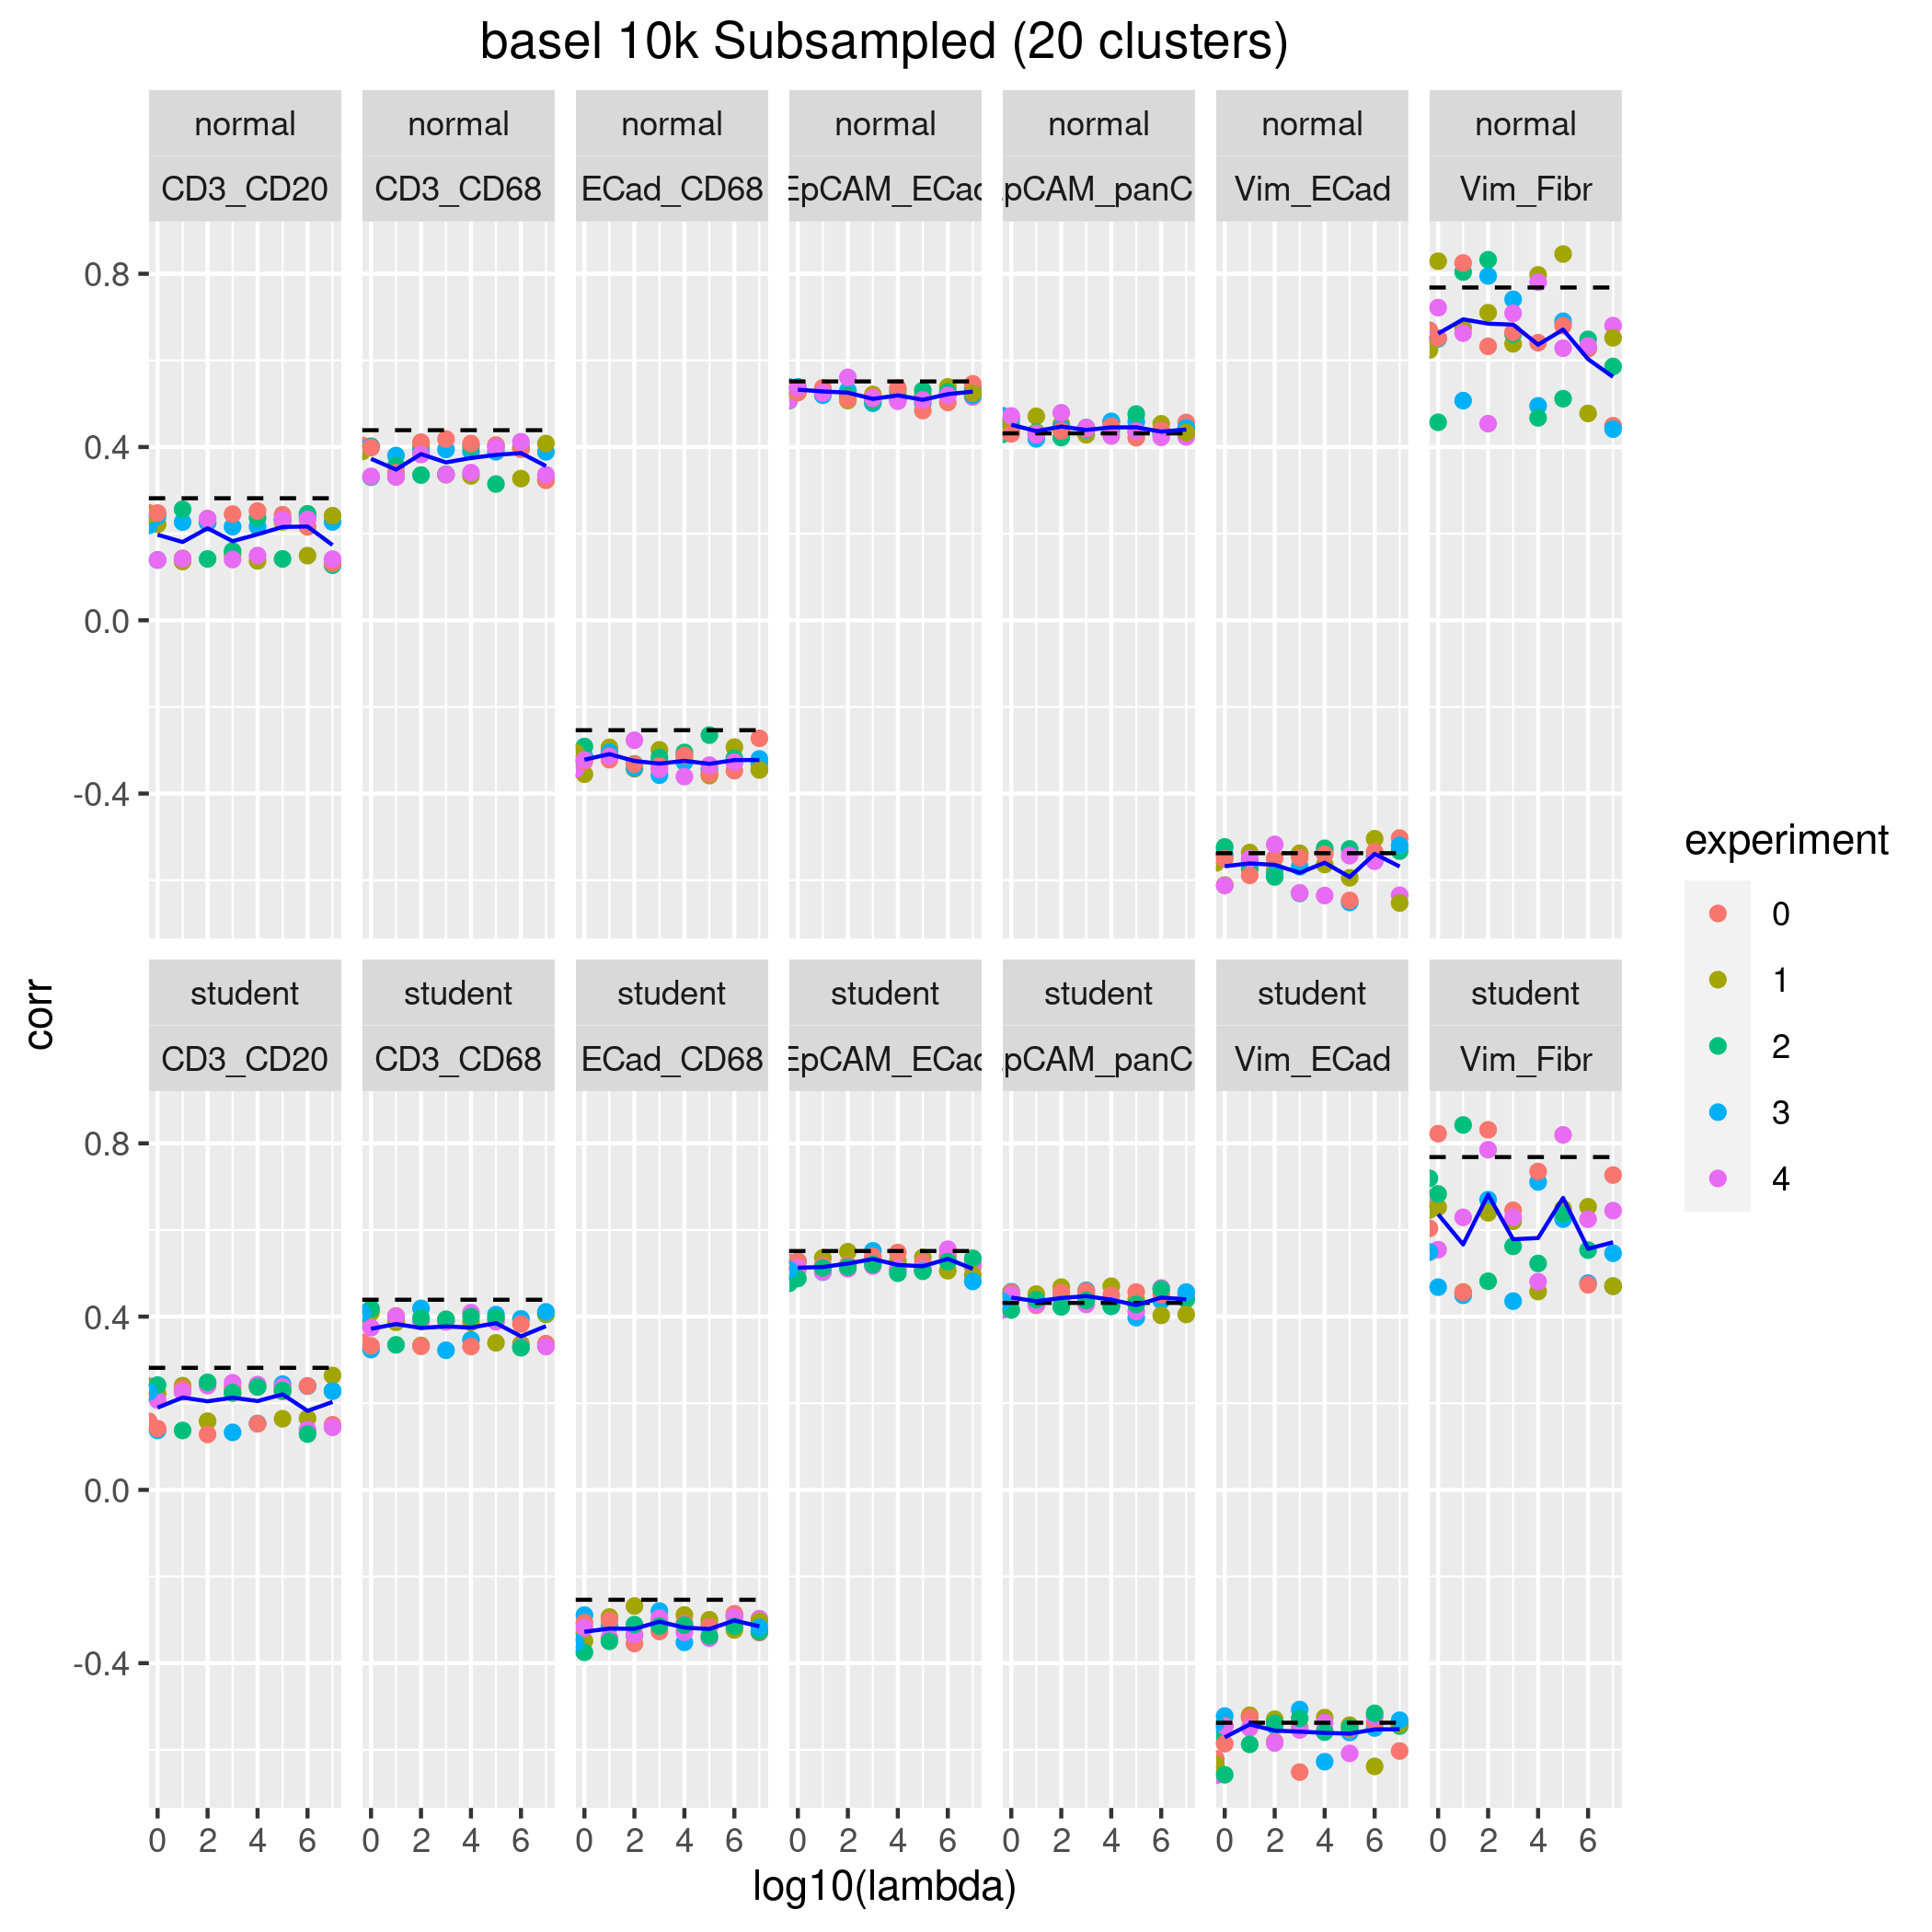

In [12]:
## kmeans correlation of selected pairs
Image.open('/home/campbell/yulee/DAMM/new/res/basel/10k/damm/plot/basel_selected_corr_theta0_nc20.png').show()

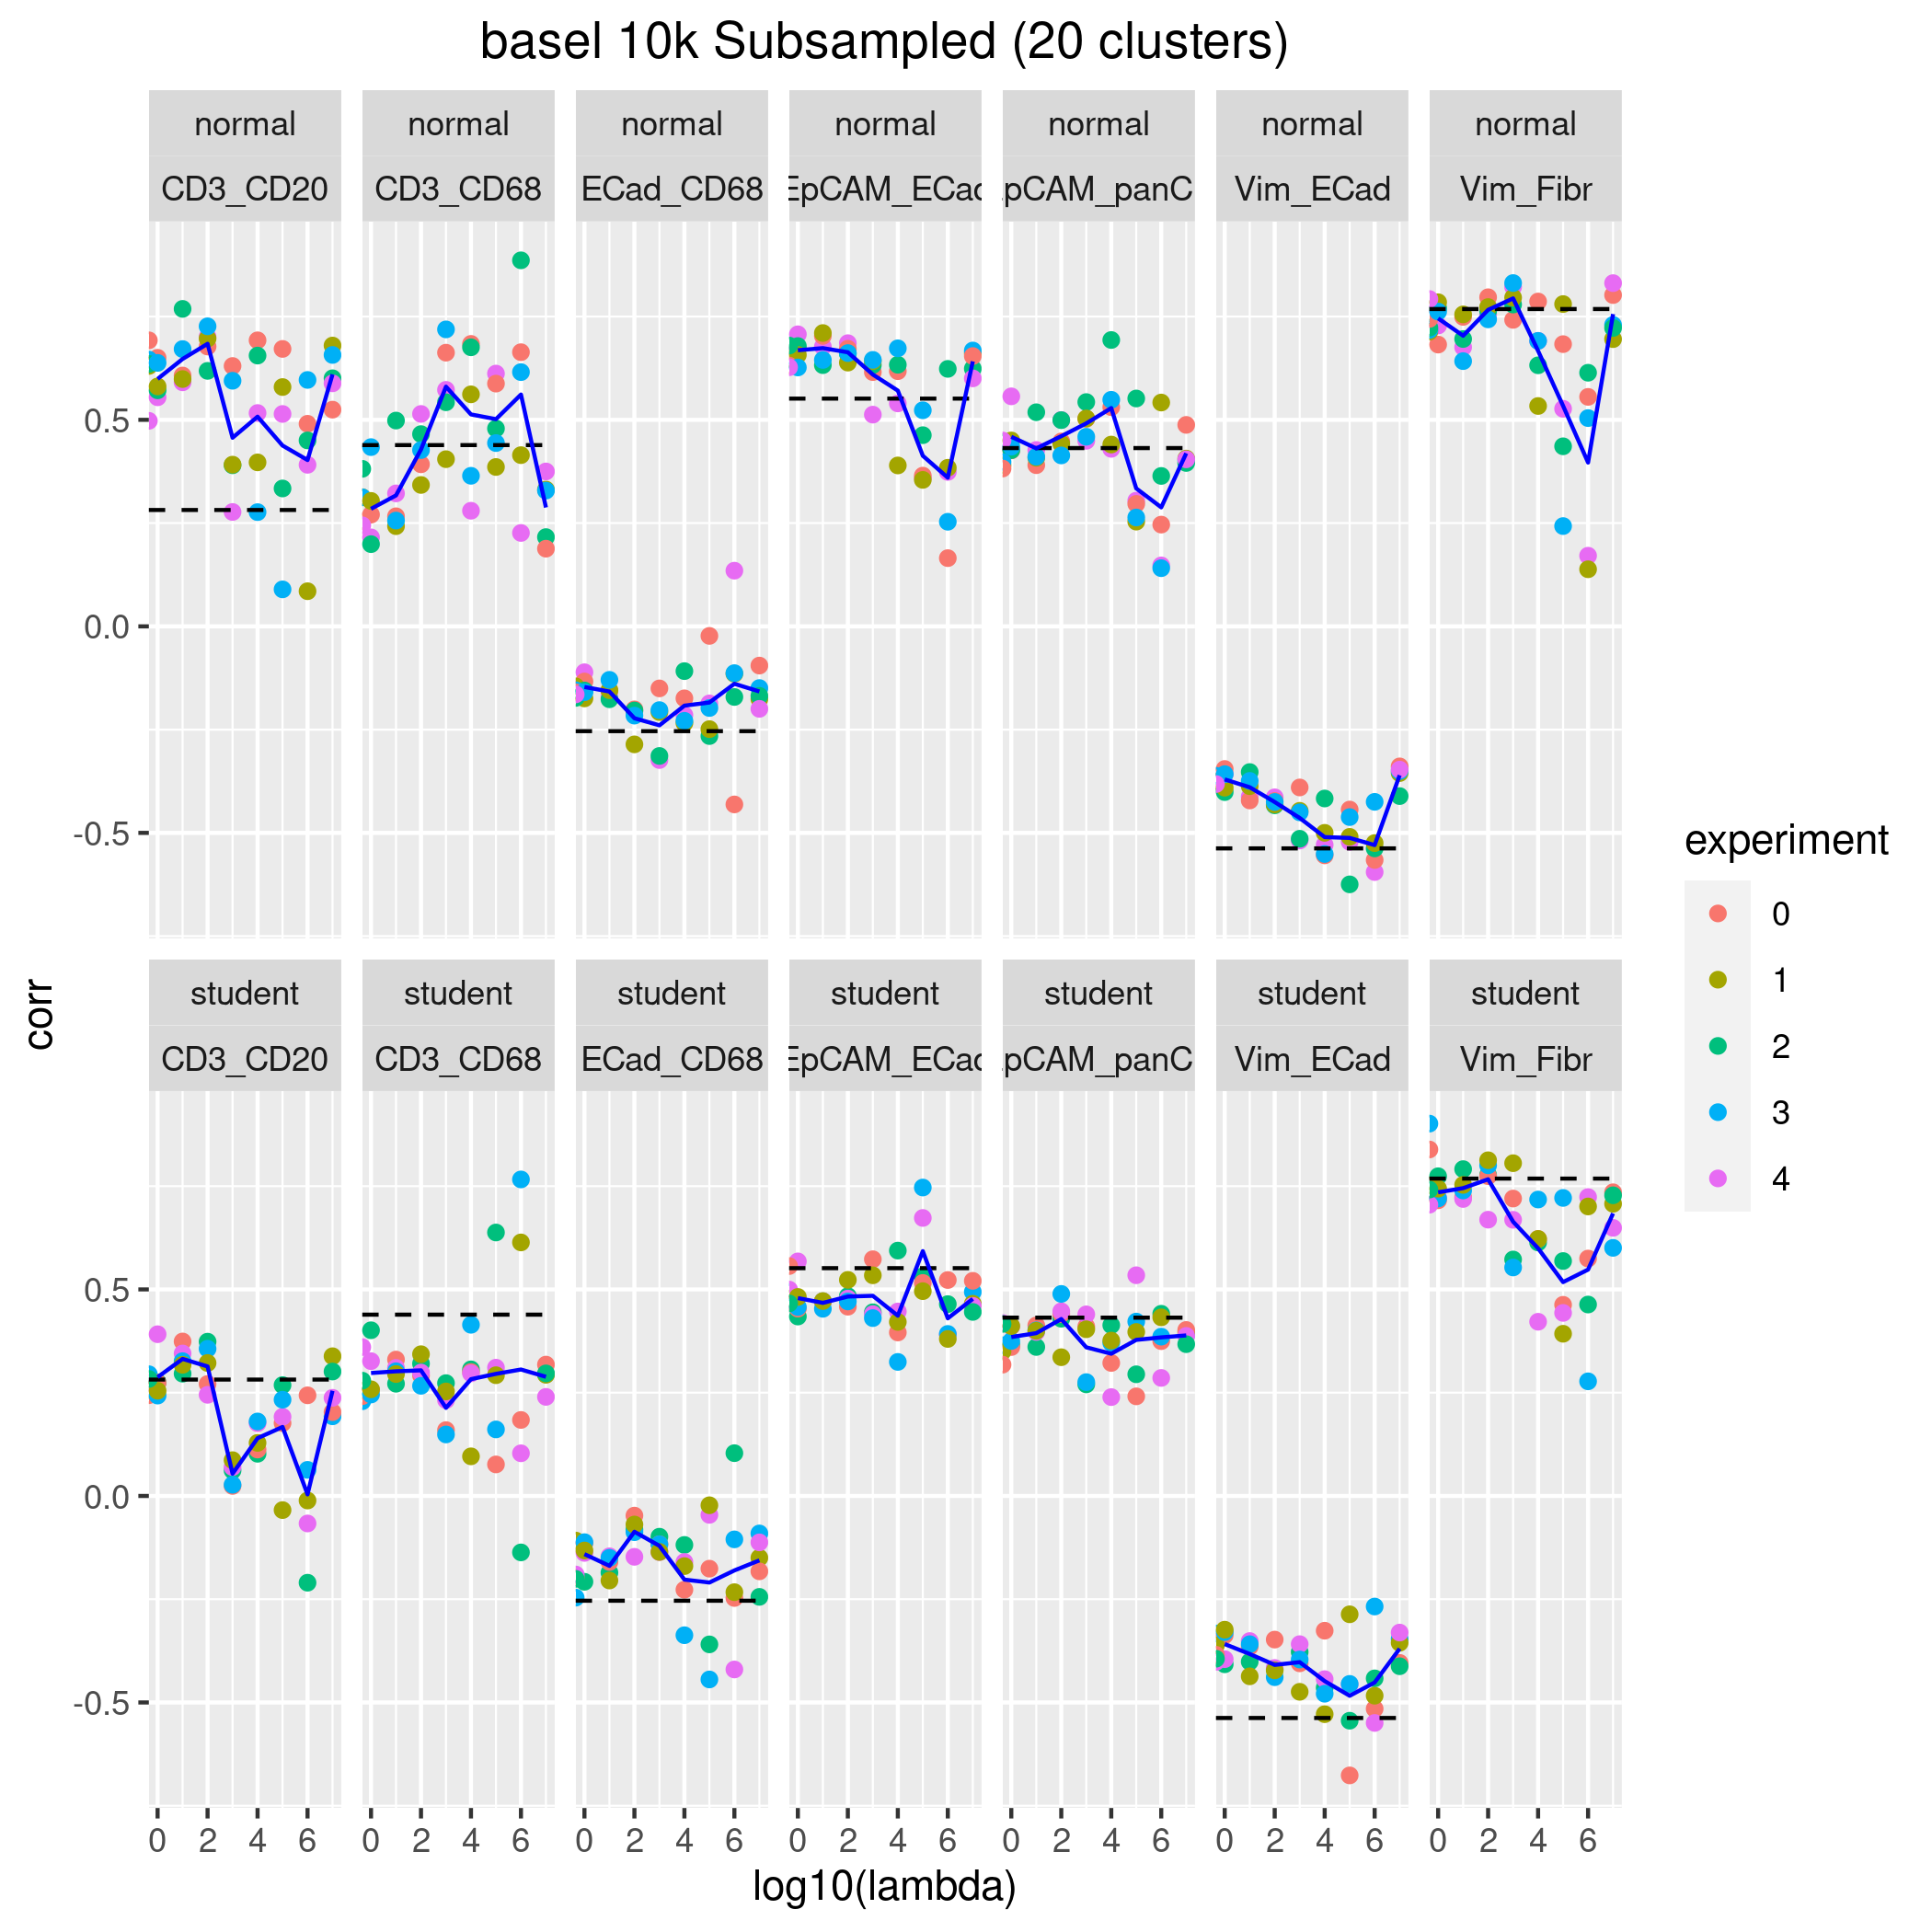

In [13]:
## damm correlation of selected pairs
Image.open('/home/campbell/yulee/DAMM/new/res/basel/10k/damm/plot/basel_selected_corr_theta1_nc20.png').show()

In [15]:
import sys
sys.path.append('/home/campbell/yulee/DAMM/new/code/pro')

from funcs import *

In [45]:
cohort = 'basel'
ss = 10
nc = 20

BatchSize = 128
learnRate = 1e-3
nm = 'student'
so = None
rr = 0
rv = 100 
r = 0

In [52]:
analysisProteins = ['CD20', 'CD3', 'CD44', 'CD45', 'CD68', 'Carbonic_Anhydrase_IX',
       'Cytokeratin19', 'Cytokeratin5', 'Cytokeratin7', 'Cytokeratin8/18',
       'DNA1', 'DNA2', 'EGFR', 'Ecadherin', 'EpCAM', 'Erk1/2', 'Fibronectin',
       'GATA3', 'H3K27me3', 'Keratin14', 'Ki67', 'Progesterone_Receptor_A/B',
       'RabbitIgGHL', 'S6', 'SMA', 'Slug', 'Sox9', 'TotalHH3', 'Twist', 
       'Vimentin', 'bCatenin', 'cMyc', 'cerbB2_Her2', 'cleavedPARP_CleavedCaspase3',
       'mTOR', 'p53', 'panCytokeratin/Keratin_Epithelial', 'phospho_HH3', 'vWF_CD31']
pretty_printing = ['CD20', 'CD3', 'CD44', 'CD45', 'CD68', 'CAIX', 
                    'CK19', 'CK5', 'CK7', 'CK8/18', 
                    'DNA1', 'DNA2', 'EGFR', 'ECadherin', 'EpCAM', 'Erk', 'Fibronectin', 
                    'GATA3', 'H3K27me3', 'CK14', 'Ki67', 'PR', 
                    'Estroge', 'S6', 'SMA', 'Slug', 'Sox9', 'TotHH3', 'Twist',
                    'Vimentin', 'bCatenin', 'cMyc', 'Her2', 'cleavedPARP', 
                    'mTOR', 'p53', 'panCK', 'phosHH3', 'vWF'] 

tr_exp = sc.read_h5ad('/home/campbell/yulee/DAMM/new/data/{}/{}k/tr_exp.h5ad'.format(cohort, ss))
te_exp = sc.read_h5ad('/home/campbell/yulee/DAMM/new/data/{}/{}k/te_exp.h5ad'.format(cohort, ss))

tr_so = torch.load('/home/campbell/yulee/DAMM/new/data/{}/{}k/tr_so.zip'.format(cohort, ss))[:,np.r_[:23,30:38,44:52]]
te_so = torch.load('/home/campbell/yulee/DAMM/new/data/{}/{}k/te_so.zip'.format(cohort, ss))[:,np.r_[:23,30:38,44:52]]

trY, trS, Theta0 = prepData(tr_exp, nc, analysisProteins)
trFY, trFS, trFL = simulate_data(trY, trS)

teY, teS, _ = prepData(te_exp, nc, analysisProteins)
teFY, teFS, teFL = simulate_data(teY, teS)

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [53]:
## get random forest classifier
rf = RandomForestClassifier()
rf.fit(torch.hstack([trFY, trFS.reshape(-1,1)]), trFL)
#rf_p_fake_singlet = rf.predict_proba(torch.hstack([teFY, teFS.reshape(-1,1)]))[:,1]
#rf_tn, rf_fp, rf_fn, rf_tp, rf_acc, rf_f1, rf_sens, rf_spec = evalM(rf_p_fake_singlet, teFL)
#torch.hstack([teFY, teFS.reshape(-1,1)])

RandomForestClassifier()

In [54]:
#Theta = torch.load('/home/campbell/yulee/DAMM/new/res/basel/10k/damm/model/theta0_nc20_student_rv100_soNone_rr0_0')
mu = Theta0['log_mu'].exp().detach()
psi = Theta0['log_psi'].exp().detach()

In [55]:
## get labels
pred_singlet_label, pred_singlet_cluster_assig_label, _ = get_assign_labels(trY, trS, Theta0, nm, so, tr_so, rr)

In [56]:
## sorted mu & psi
sorted_mu = mu[pd.Series(pred_singlet_cluster_assig_label[0]).value_counts().index]
sorted_psi = psi[pd.Series(pred_singlet_cluster_assig_label[0]).value_counts().index]

Text(34.0, 0.5, 'Cluster')

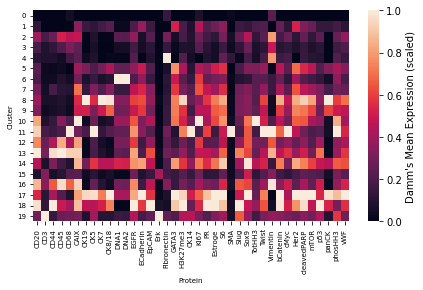

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
s2 = scaler.fit(sorted_mu)
s3 = scaler.transform(sorted_mu)
mat = pd.DataFrame(s3, columns = pretty_printing)

ax = sns.heatmap(mat, yticklabels = True, xticklabels = True, cbar_kws={'label': "Damm's Mean Expression (scaled)"})
ax.set_xticklabels(ax.get_xticklabels(), size = 7, horizontalalignment = 'center')
ax.set_yticklabels(ax.get_yticklabels(), size = 7, verticalalignment = 'center')
ax.figure.tight_layout()
plt.xlabel("Protein", size = 7)
plt.ylabel("Cluster", size = 7)

In [22]:
## doublet probability for each cluster
rf.predict_proba(torch.hstack([sorted_mu, sorted_psi.reshape(-1,1)]))[:,0] 

array([0.53, 0.51, 0.53, 0.68, 0.56, 0.48, 0.6 , 0.49, 0.67, 0.33, 0.65,
       0.57, 0.3 , 0.64, 0.57, 0.34, 0.79, 0.34, 0.65, 0.56])

In [19]:
## for eddy
fns1 = glob.glob('/home/campbell/yulee/DAMM/new/res/eddy/10k/damm/plot/theta0*student*_rv100_*0_clus_s.png')
fns2 = glob.glob('/home/campbell/yulee/DAMM/new/res/eddy/10k/damm/plot/theta1*student*_rv100_*0_clus_s.png')

fns3 = glob.glob('/home/campbell/yulee/DAMM/new/res/eddy/10k/damm/plot/theta0*student*_rv100_*0_clus_as.png')
fns4 = glob.glob('/home/campbell/yulee/DAMM/new/res/eddy/10k/damm/plot/theta1*student*_rv100_*0_clus_as.png')

#fns5 = glob.glob('/home/campbell/yulee/DAMM/new/res/basel/10k/damm/plot/theta0*student*0_clus_cellsize.png')
fns6 = glob.glob('/home/campbell/yulee/DAMM/new/res/eddy/10k/damm/plot/theta1*student*_rv100_*0_clus_cellsize.png')

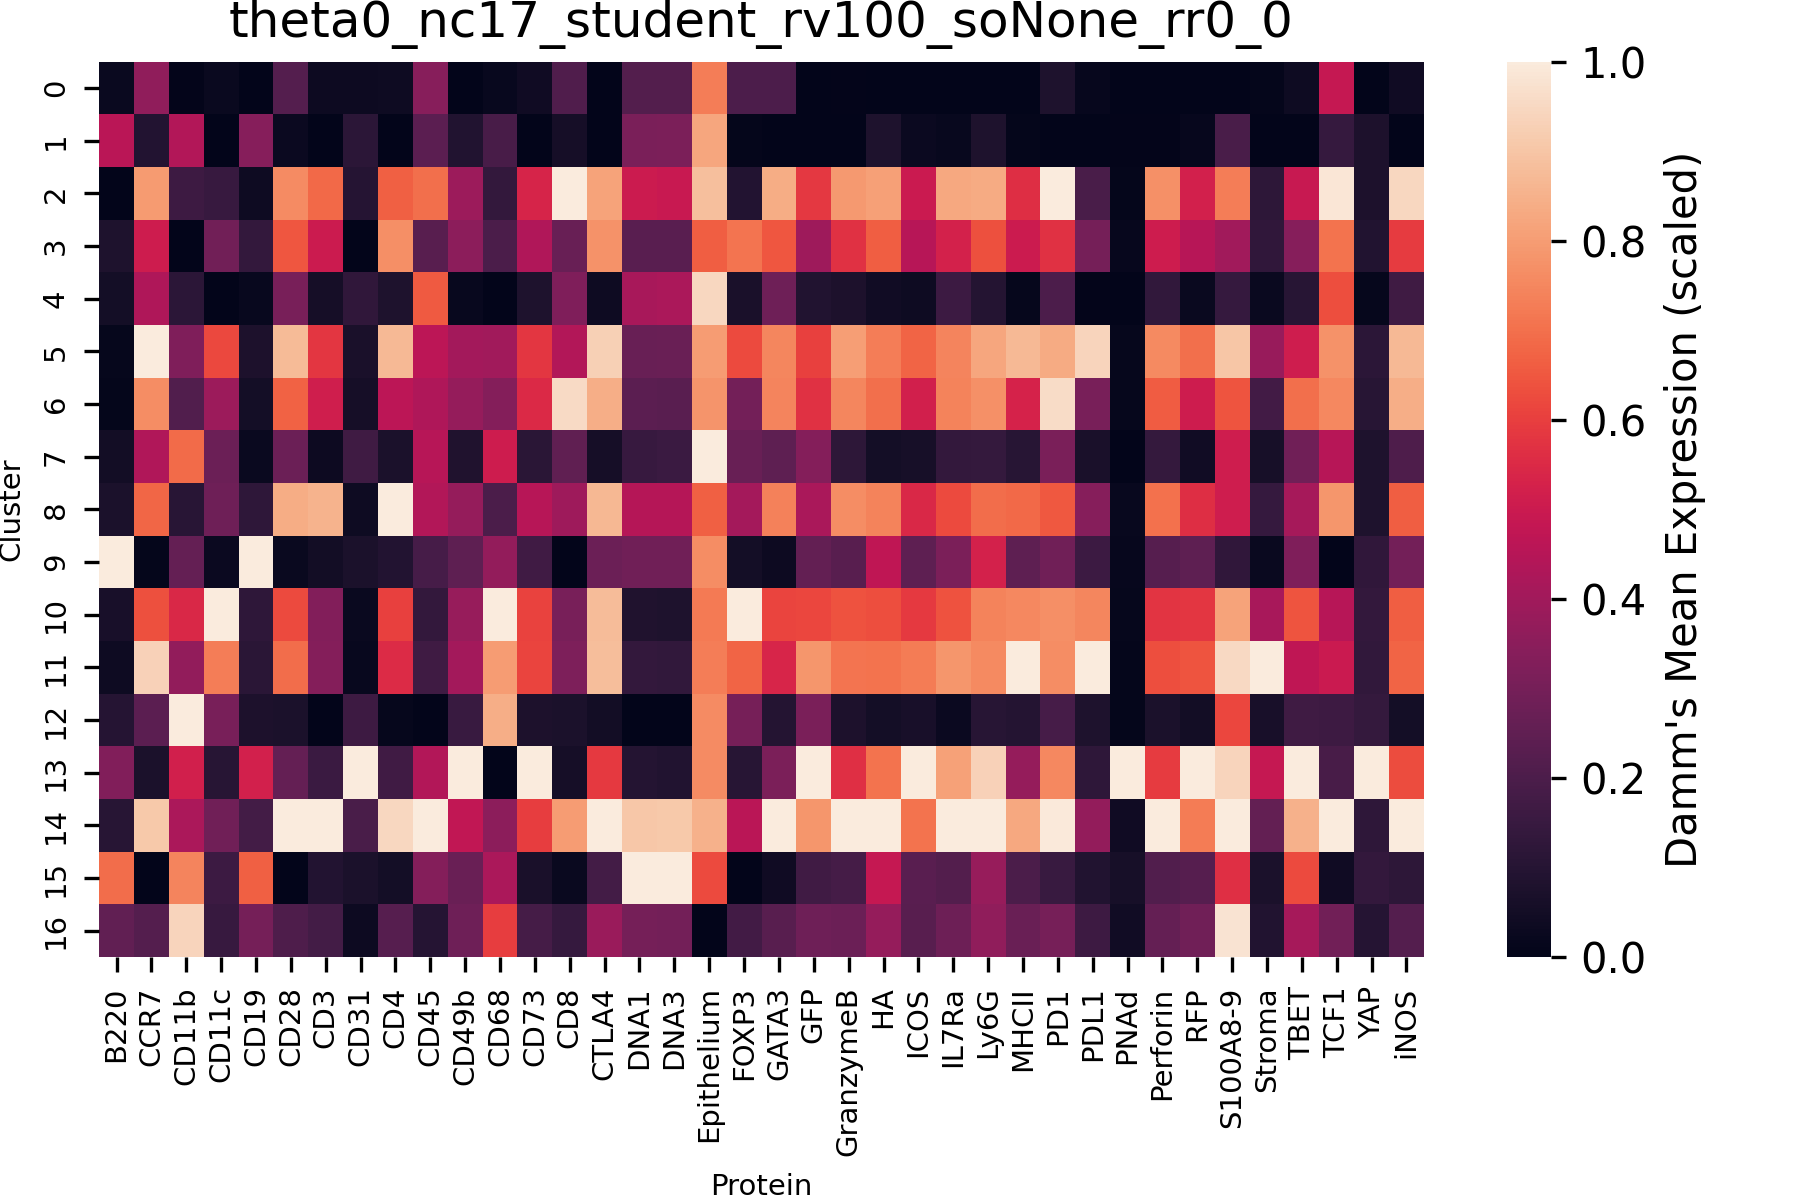

In [20]:
## kmeans
for fn in fns1:
    im = Image.open(fn)
    im.show()

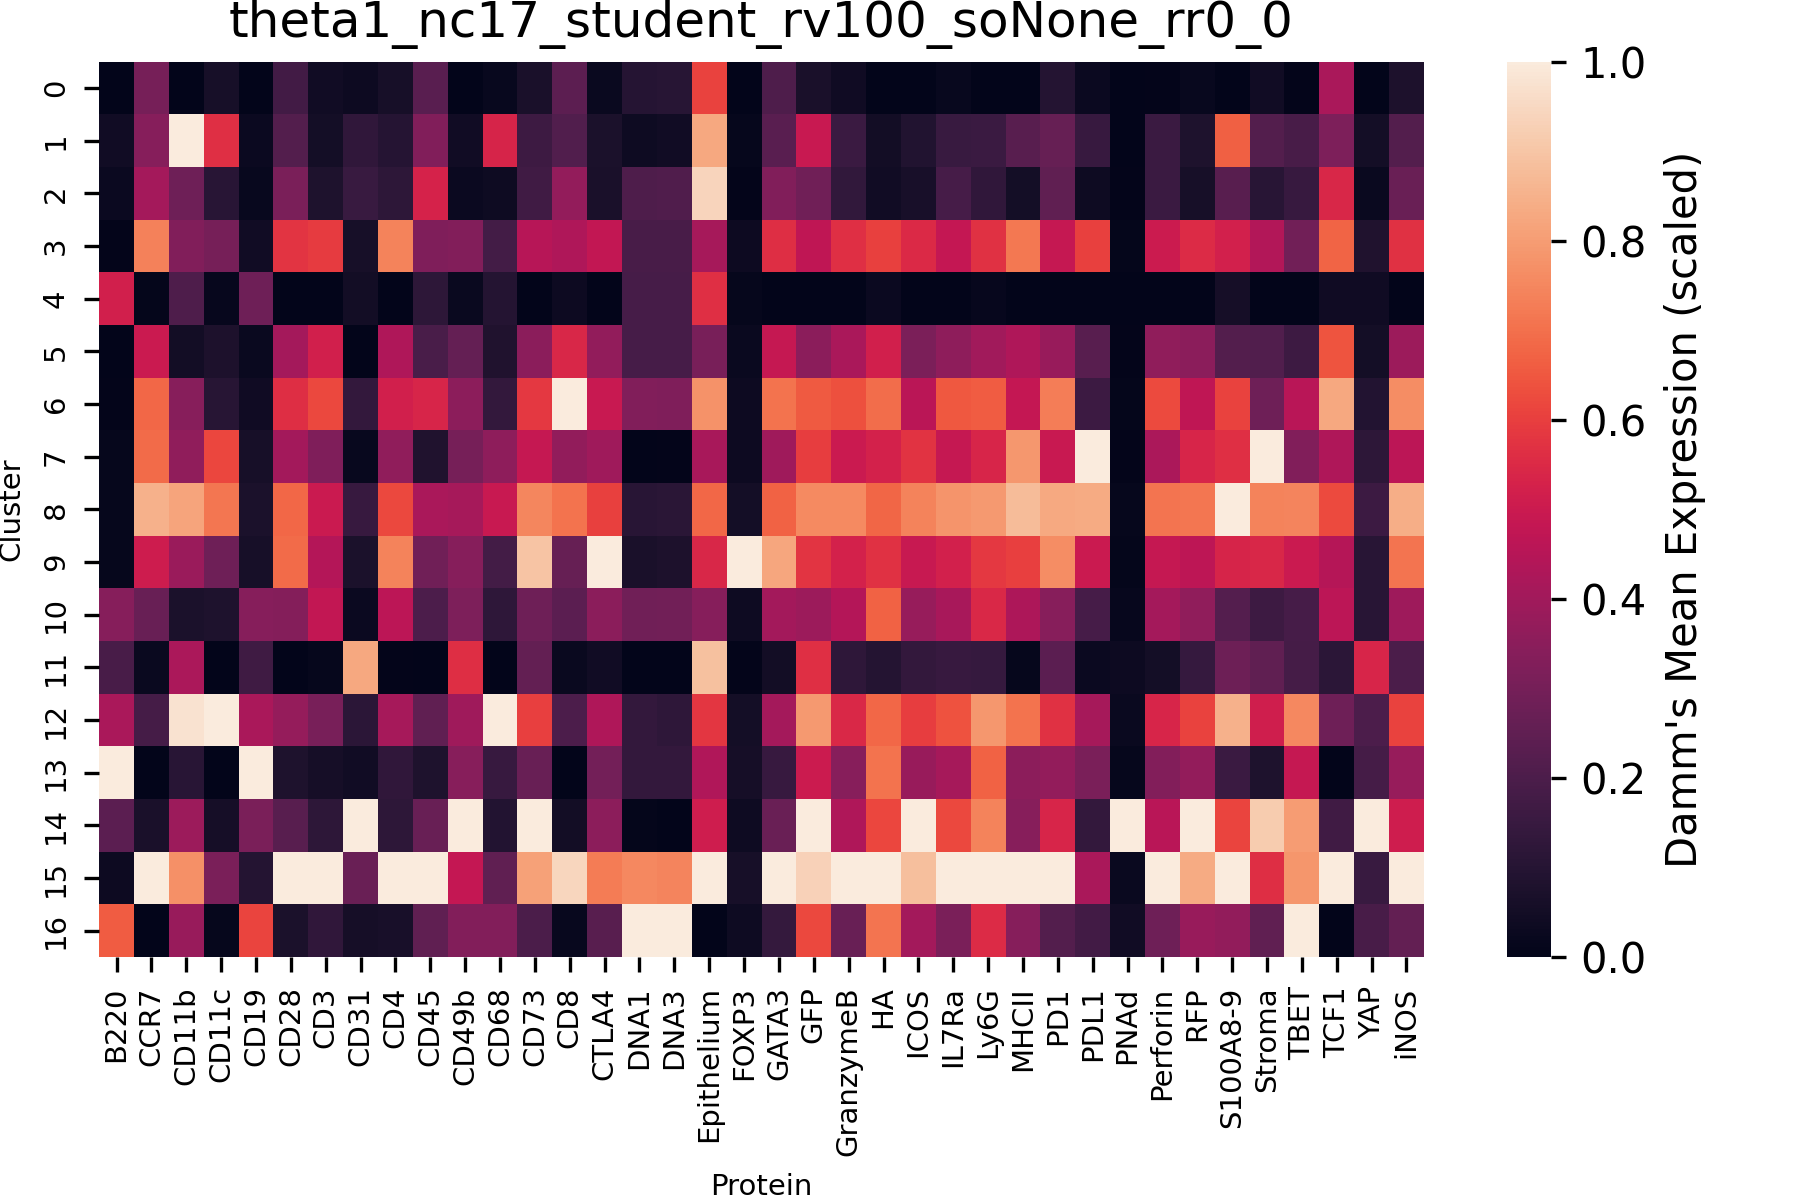

In [21]:
## damm
for fn in fns2:
    im = Image.open(fn)
    im.show()

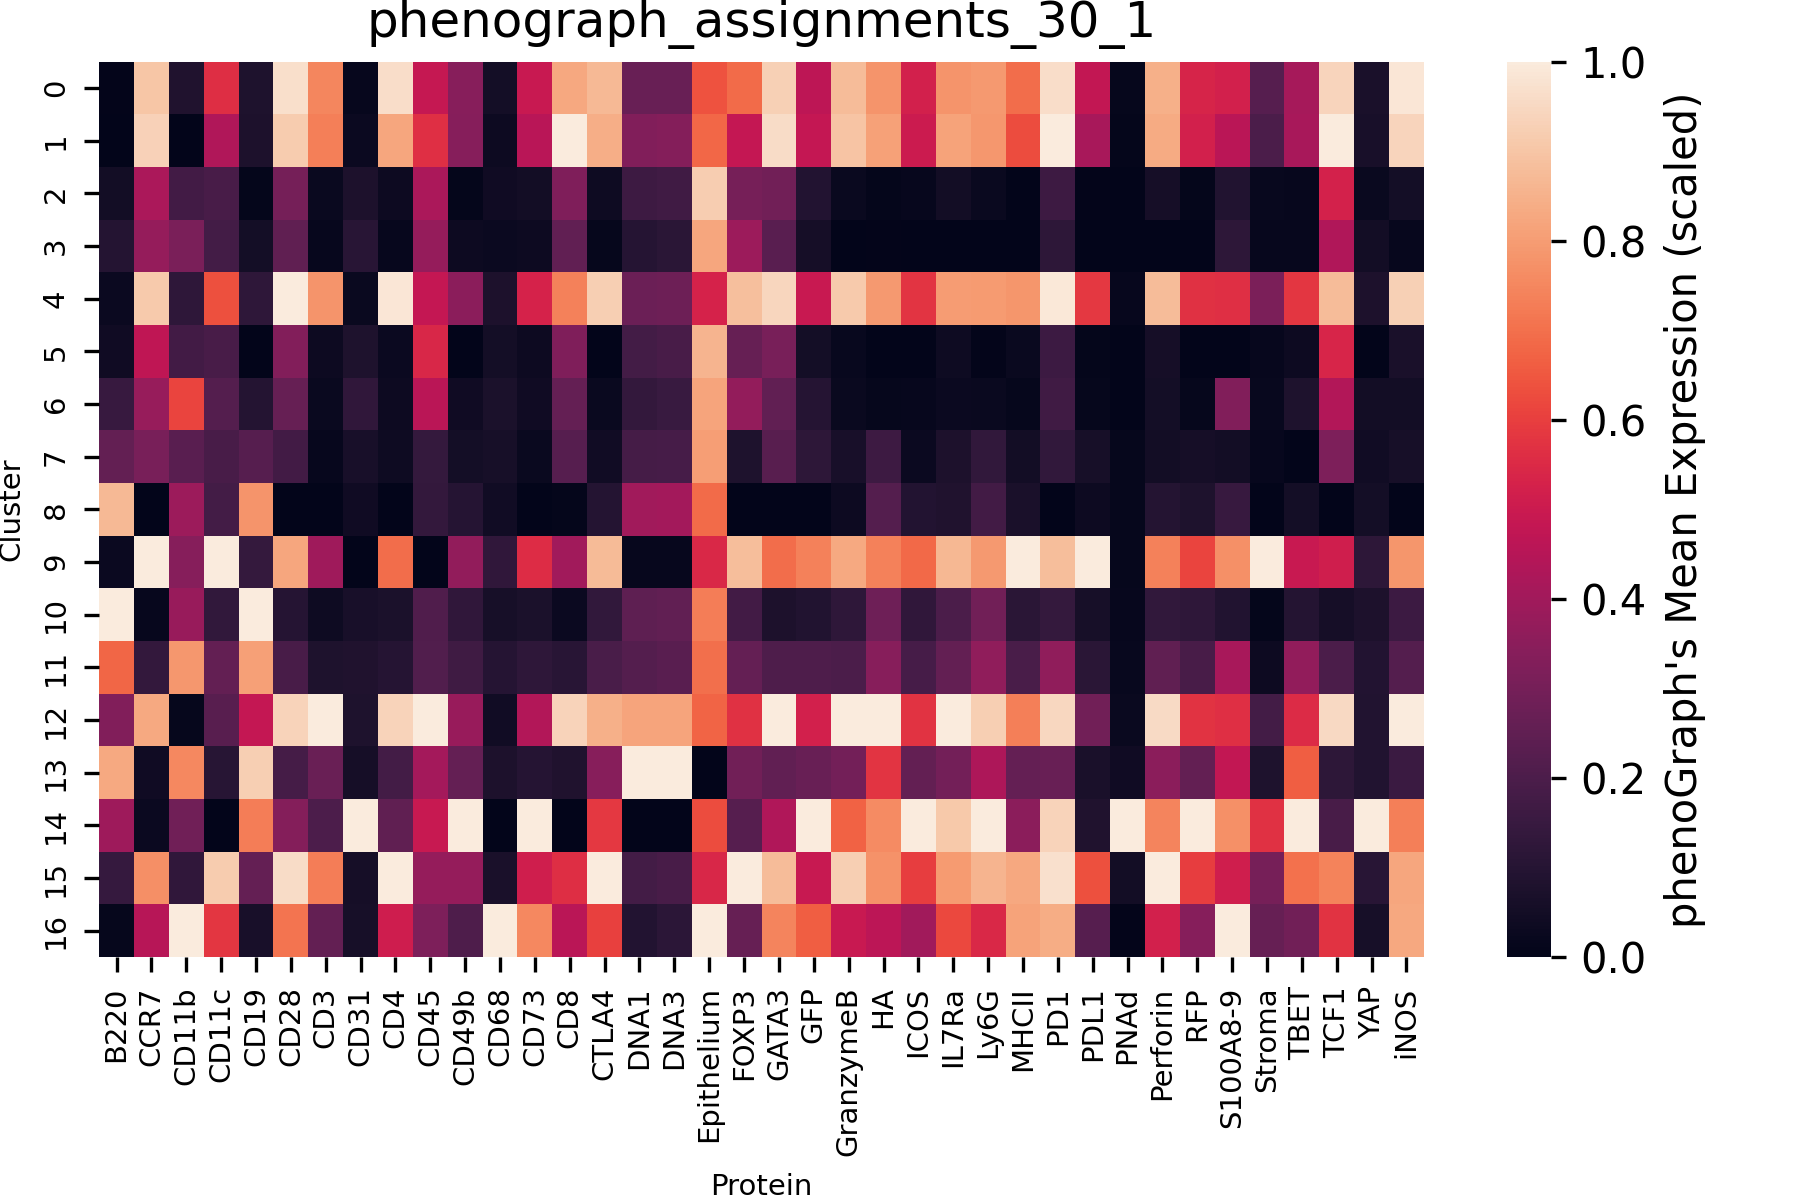

In [34]:
## phenograph
Image.open('/home/campbell/yulee/DAMM/new/res/eddy/10k/pheno/plot/phenograph_assignments_30_1_clus_s.png').show()

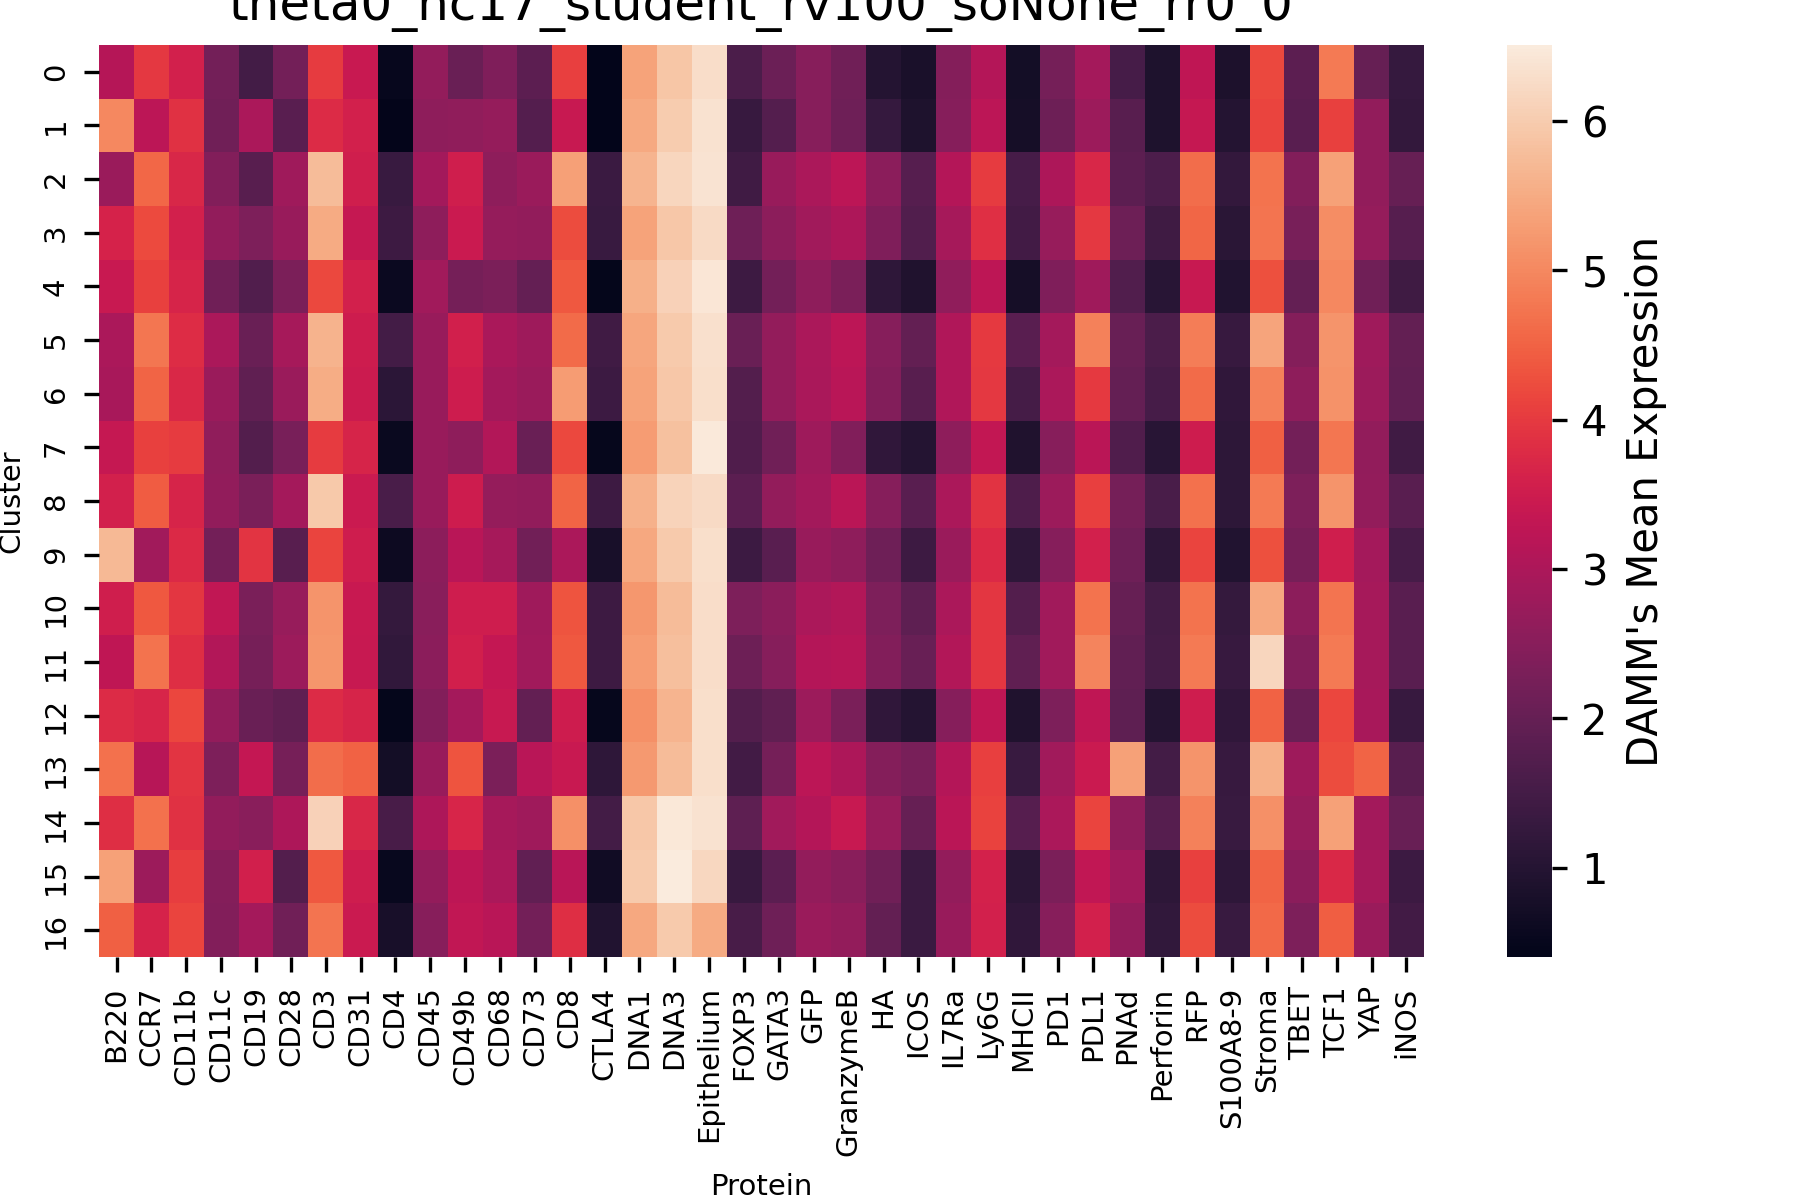

In [22]:
## kmeans arcsinh (0.1)
for fn in fns3:
    im = Image.open(fn)
    im.show()

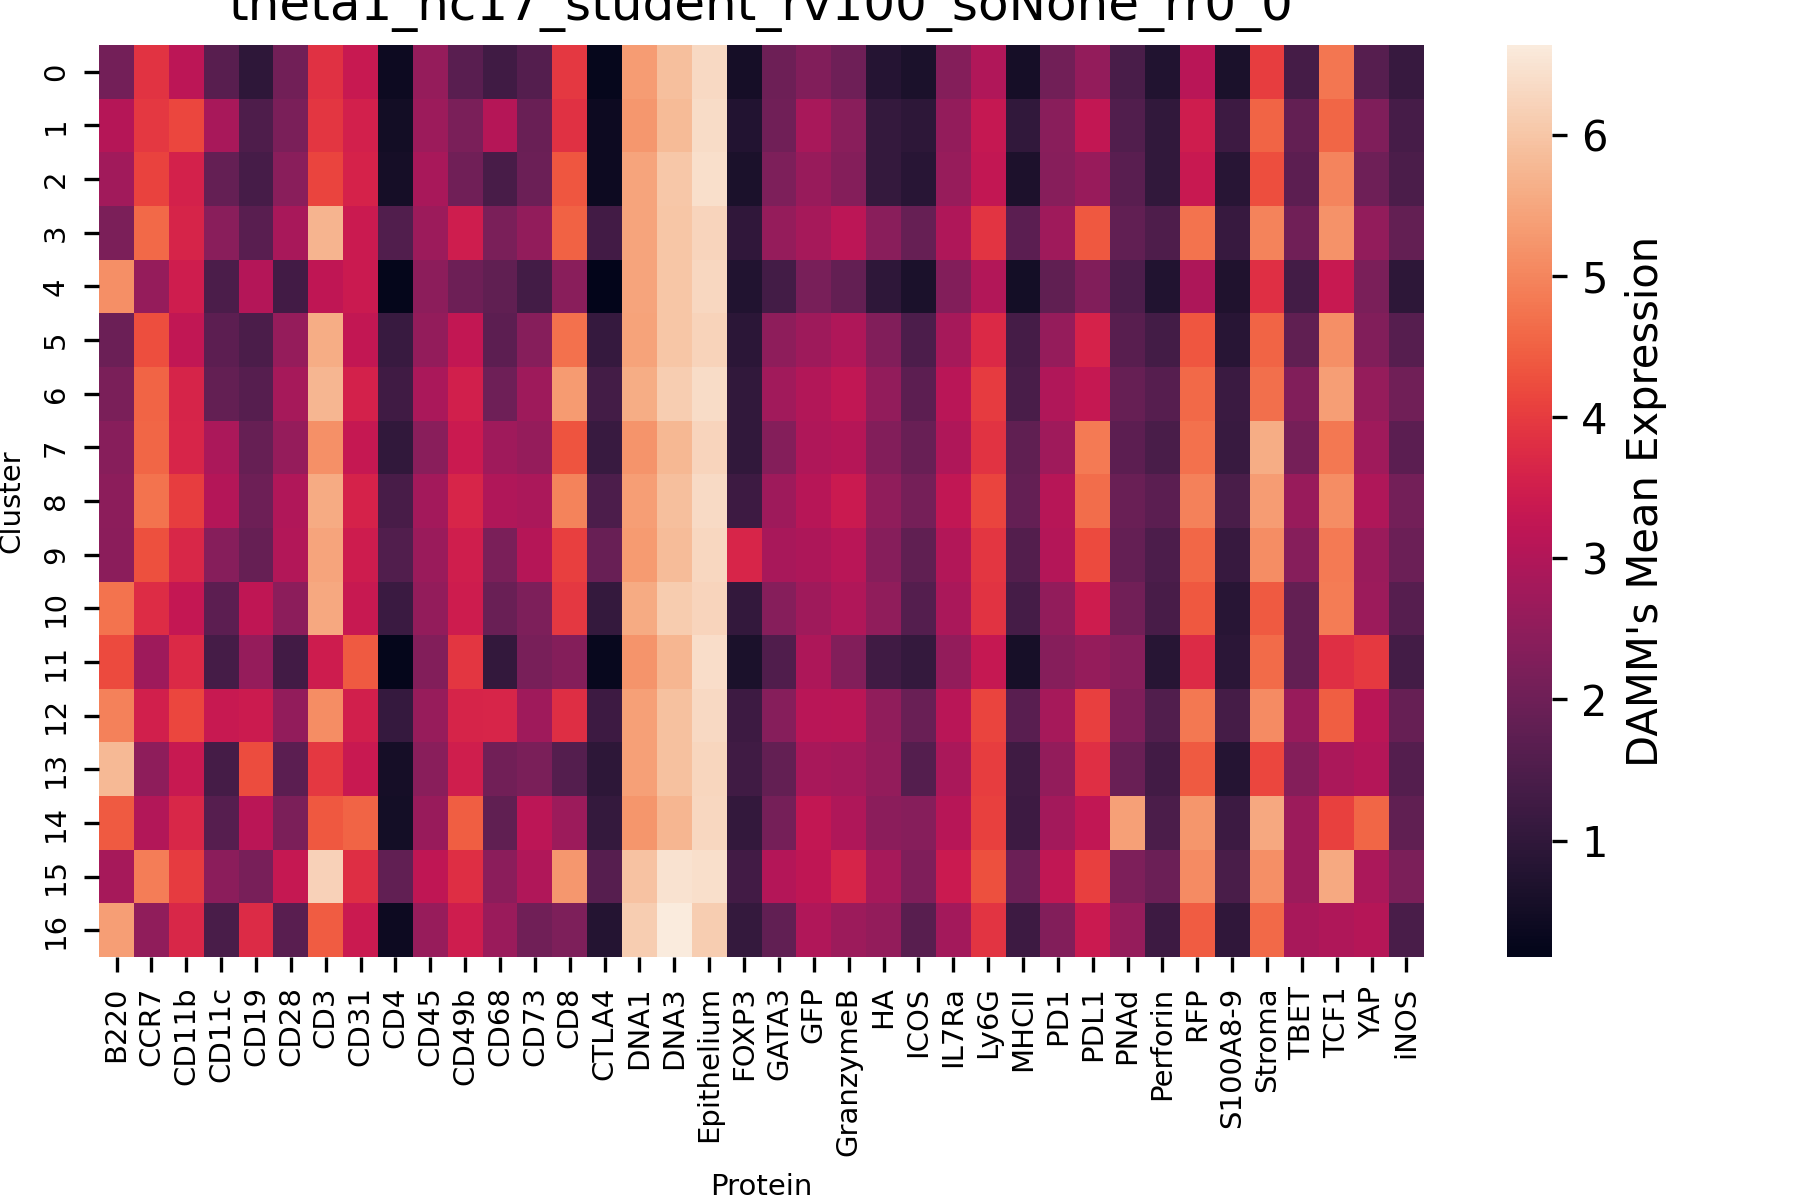

In [23]:
## damm arcsinh (0.1)
for fn in fns4:
    im = Image.open(fn)
    im.show()

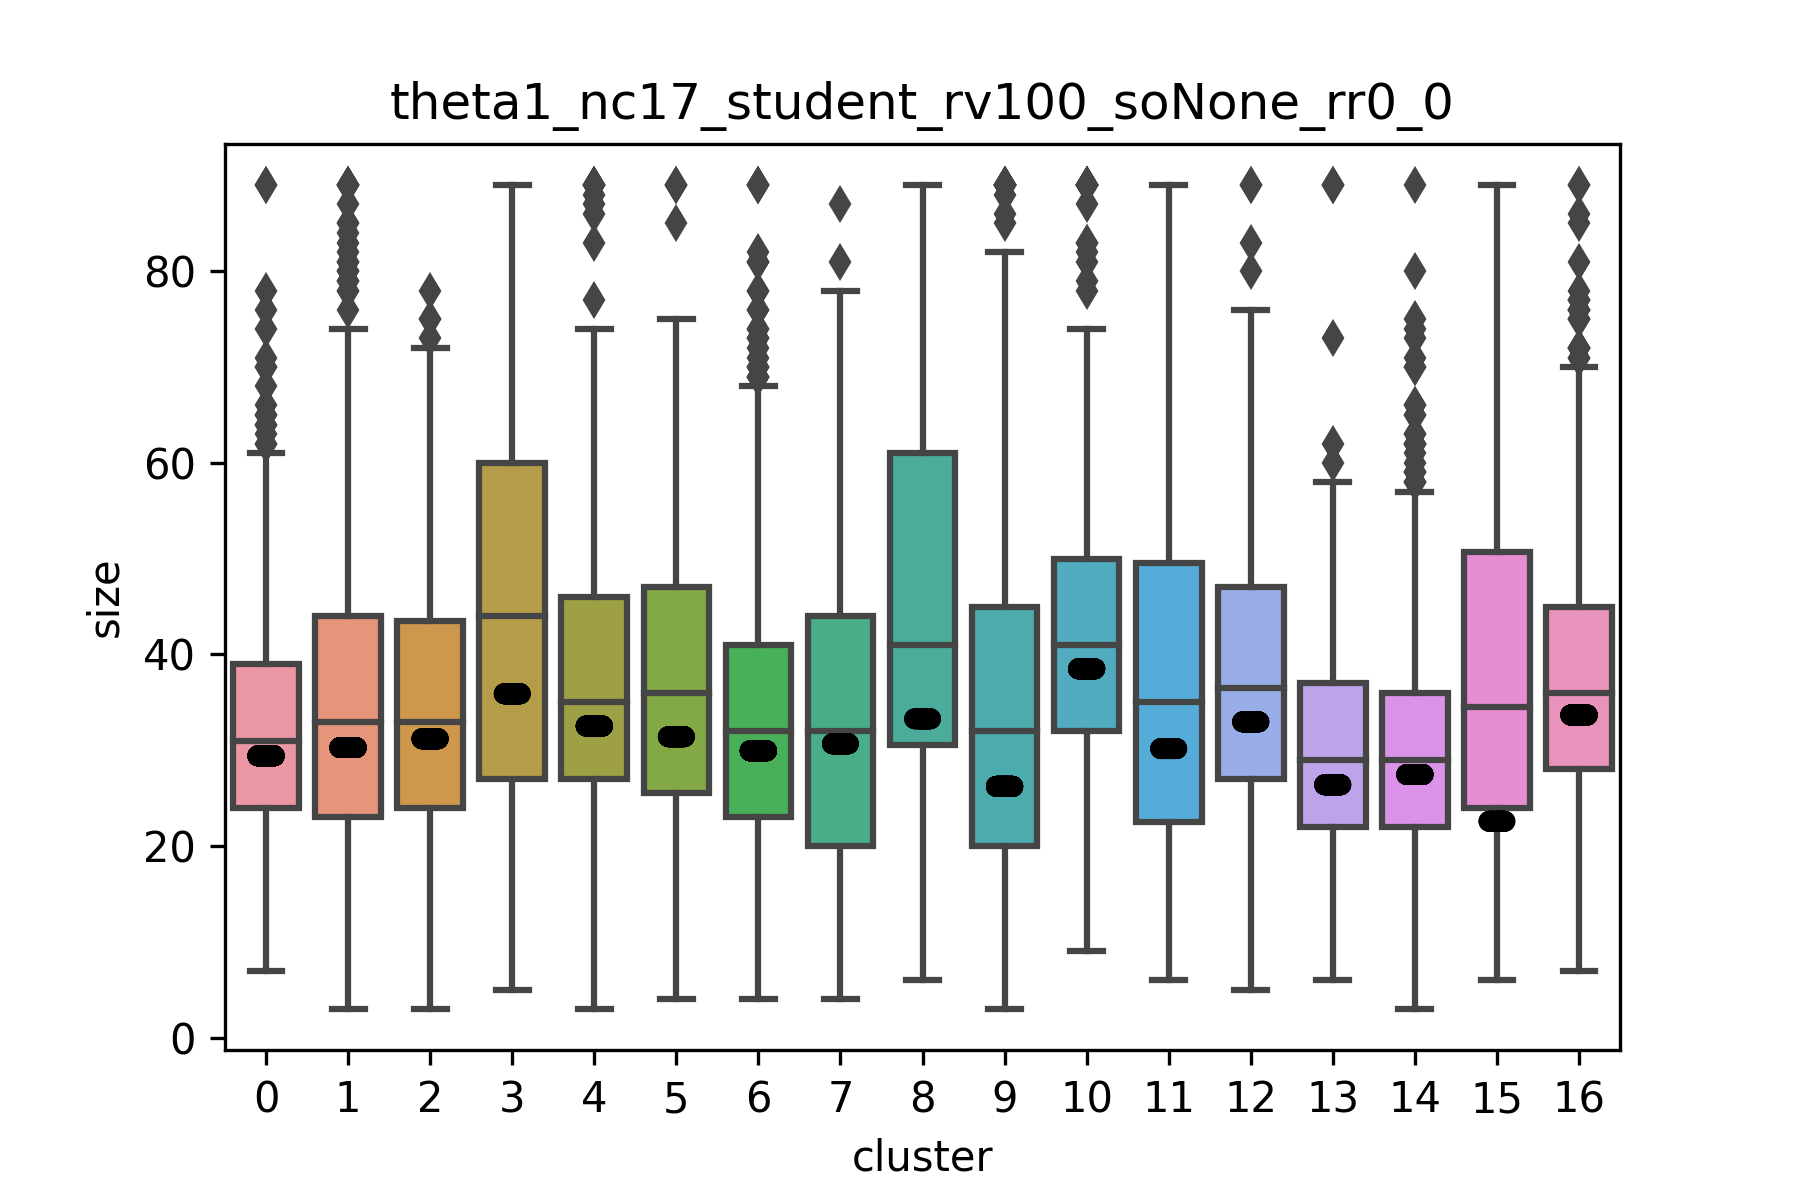

In [24]:
##
for fn in fns6:
    im = Image.open(fn)
    im.show()

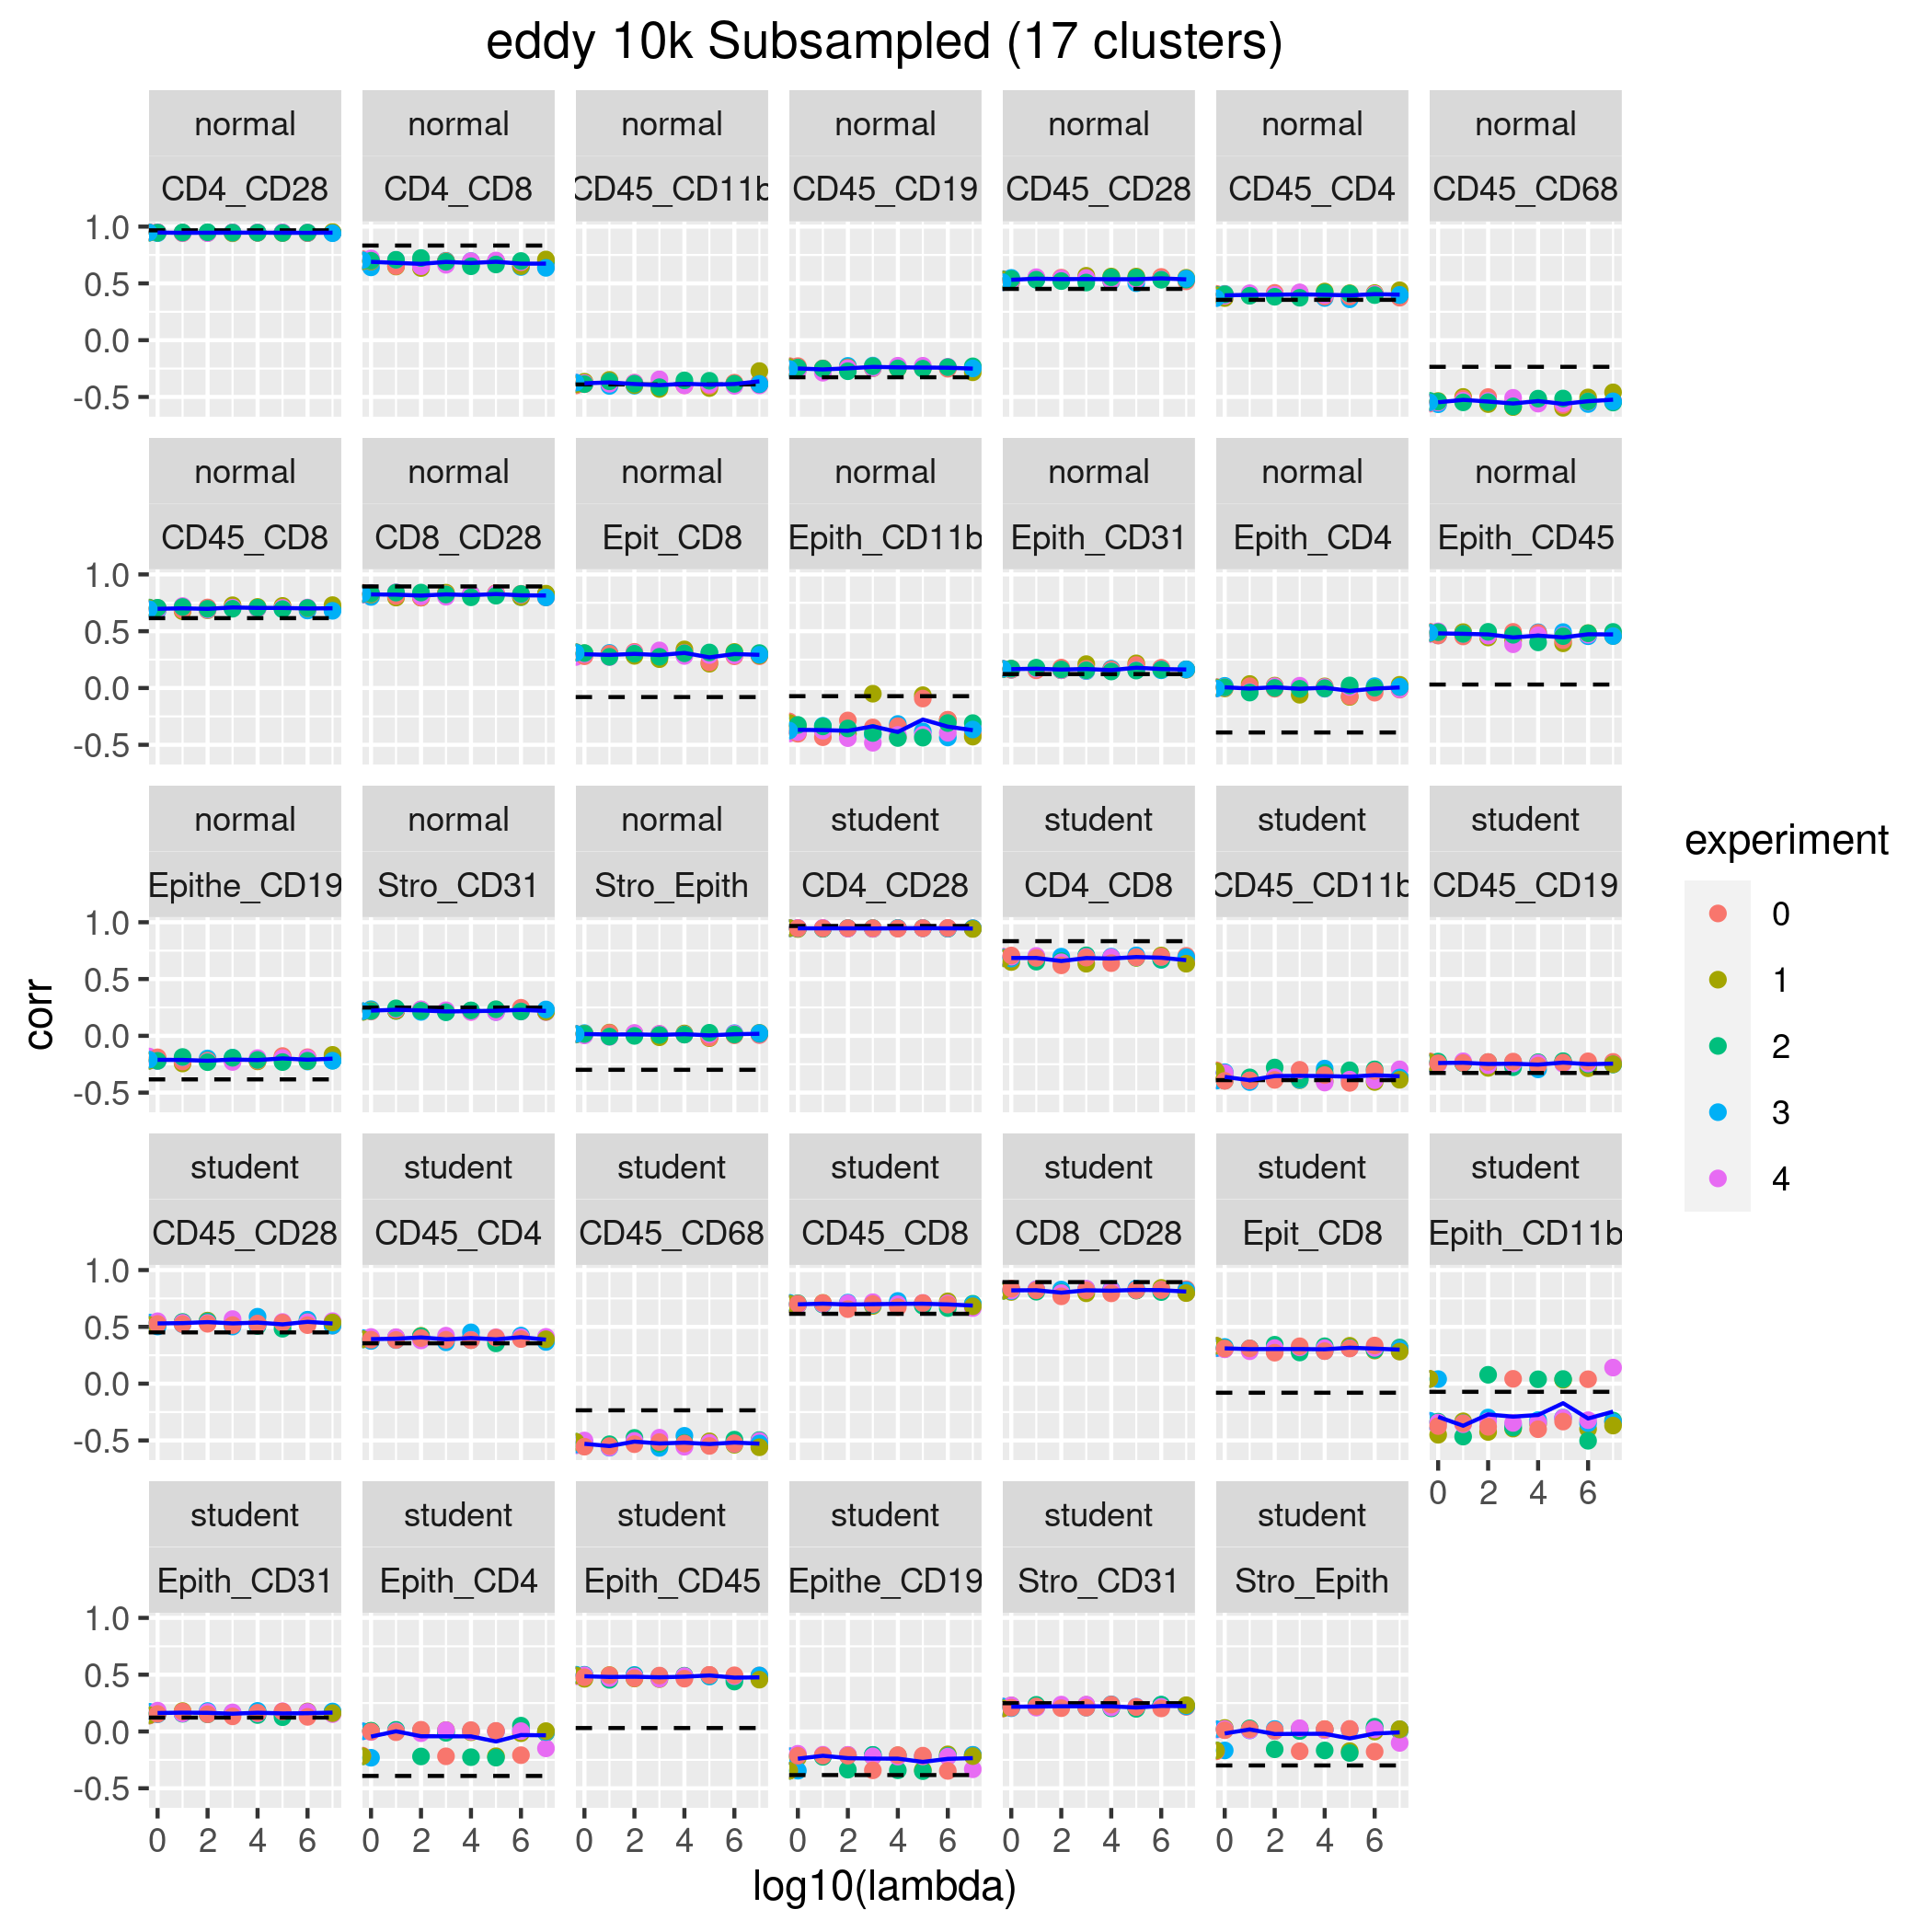

In [25]:
## kmeans correlation of selected pairs
Image.open('/home/campbell/yulee/DAMM/new/res/eddy/10k/damm/plot/eddy_selected_corr_theta0_nc17.png').show()

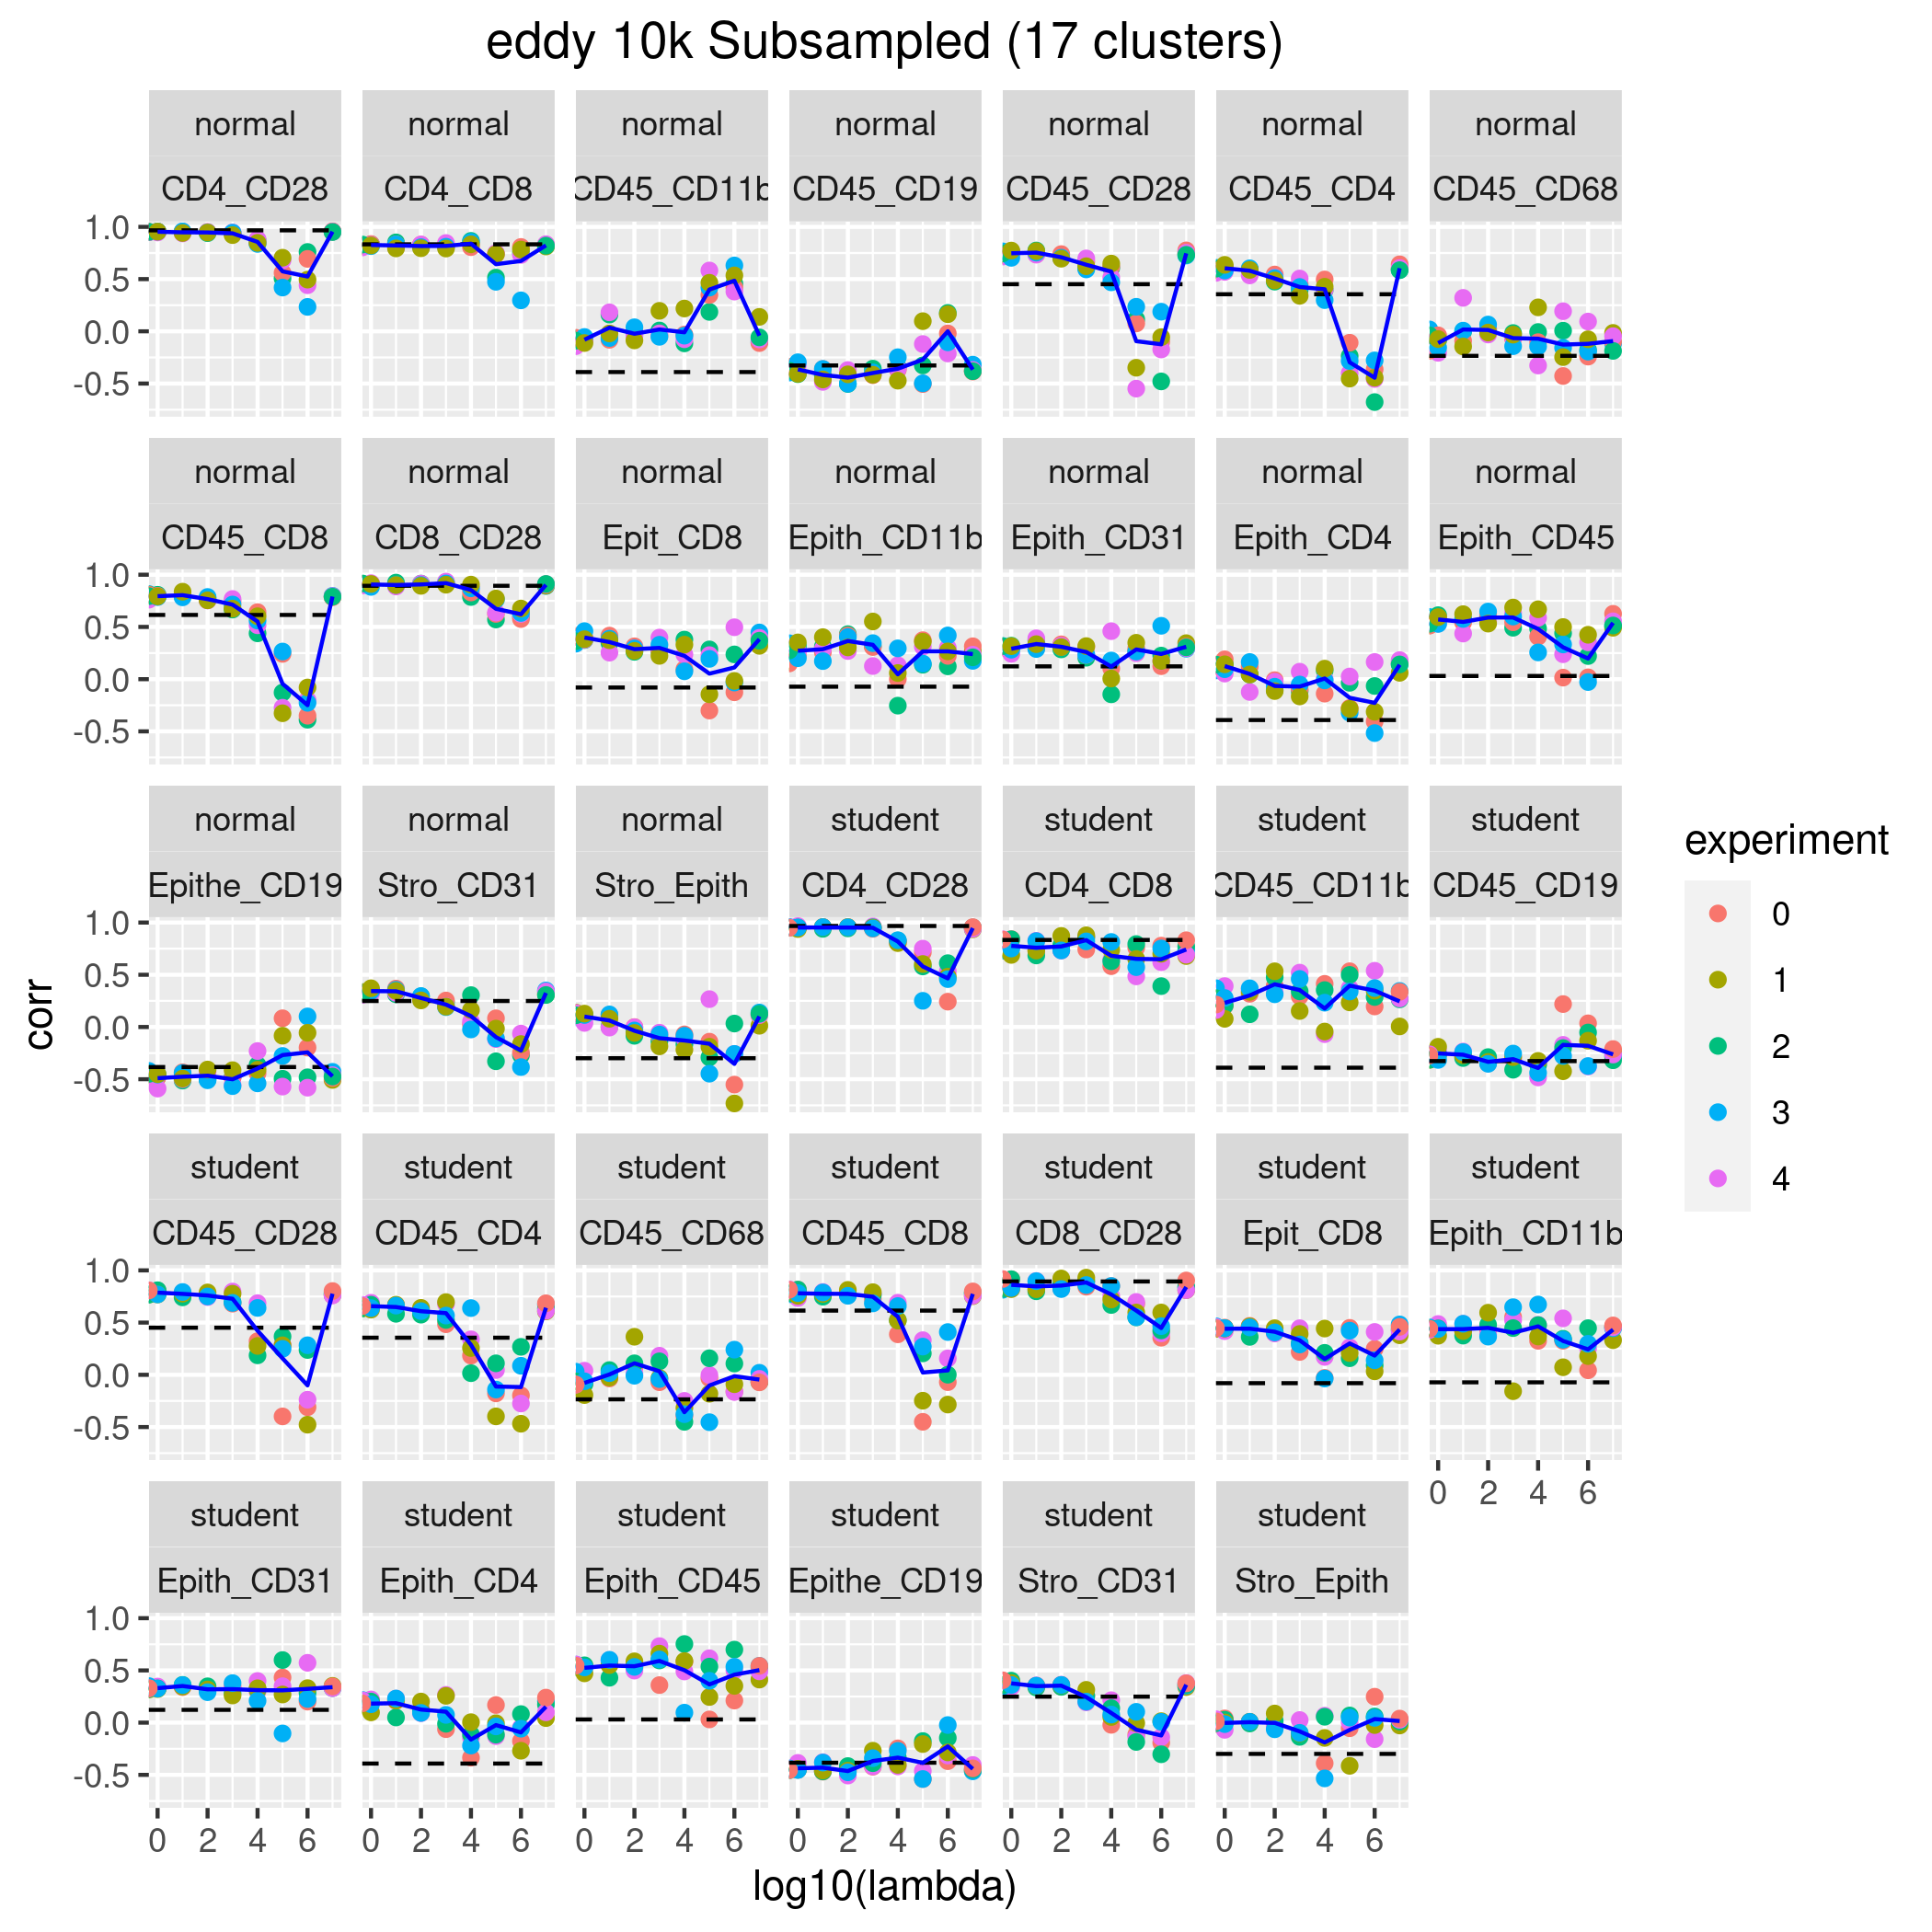

In [26]:
## damm correlation of selected pairs
Image.open('/home/campbell/yulee/DAMM/new/res/eddy/10k/damm/plot/eddy_selected_corr_theta1_nc17.png').show()

In [23]:
cohort = 'eddy'
ss = 10
nc = 17

In [31]:
analysisProteins = ['B220', 'CCR7', 'CD11b', 'CD11c', 'CD19', 'CD28', 'CD3', 'CD31', 'CD4',
       'CD45', 'CD49b', 'CD68', 'CD73', 'CD8', 'CTLA4', 'DNA1', 'DNA3',
       'Epithelium', 'FOXP3', 'GATA3', 'GFP', 'GranzymeB', 'HA', 'ICOS',
       'IL7Ra', 'Ly6G', 'MHCII', 'PD1', 'PDL1', 'PNAd', 'Perforin', 'RFP',
       'S100A8-9', 'Stroma', 'TBET', 'TCF1', 'YAP', 'iNOS']

tr_exp = sc.read_h5ad('/home/campbell/yulee/DAMM/new/data/{}/{}k/tr_exp.h5ad'.format(cohort, ss))
te_exp = sc.read_h5ad('/home/campbell/yulee/DAMM/new/data/{}/{}k/te_exp.h5ad'.format(cohort, ss))

tr_so = torch.load('/home/campbell/yulee/DAMM/new/data/{}/{}k/tr_so.zip'.format(cohort, ss))
te_so = torch.load('/home/campbell/yulee/DAMM/new/data/{}/{}k/te_so.zip'.format(cohort, ss))

trY, trS, Theta0 = prepData(tr_exp, nc, analysisProteins)
trFY, trFS, trFL = simulate_data(trY, trS)

teY, teS, _ = prepData(te_exp, nc, analysisProteins)
teFY, teFS, teFL = simulate_data(teY, teS)

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [32]:
## get random forest classifier
rf = RandomForestClassifier()
rf.fit(torch.hstack([trFY, trFS.reshape(-1,1)]), trFL)

RandomForestClassifier()

In [33]:
## retrieve damm thetas
#Theta0 = torch.load('/home/campbell/yulee/DAMM/new/res/eddy/10k/damm/model/theta0_nc17_student_rv100_soNone_rr0_0')
#Theta1 = torch.load('/home/campbell/yulee/DAMM/new/res/eddy/10k/damm/model/theta1_nc17_student_rv100_soNone_rr0_0')
mu = Theta0['log_mu'].exp().detach()
psi = Theta0['log_psi'].exp().detach()

In [37]:
## sorted mu & psi
pred_singlet_label, pred_singlet_cluster_assig_label, _ = get_assign_labels(trY, trS, Theta0, nm, so, tr_so, rr)
sorted_mu = mu[pd.Series(pred_singlet_cluster_assig_label[0]).value_counts().index]
sorted_psi = psi[pd.Series(pred_singlet_cluster_assig_label[0]).value_counts().index]

Text(37.0, 0.5, 'Cluster')

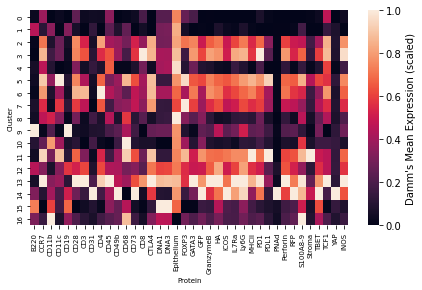

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
pretty_printing = analysisProteins
scaler = MinMaxScaler()
s2 = scaler.fit(sorted_mu)
s3 = scaler.transform(sorted_mu)
mat = pd.DataFrame(s3, columns = pretty_printing)

ax = sns.heatmap(mat, yticklabels = True, xticklabels = True, cbar_kws={'label': "Damm's Mean Expression (scaled)"})
ax.set_xticklabels(ax.get_xticklabels(), size = 7, horizontalalignment = 'center')
ax.set_yticklabels(ax.get_yticklabels(), size = 7, verticalalignment = 'center')
ax.figure.tight_layout()
plt.xlabel("Protein", size = 7)
plt.ylabel("Cluster", size = 7)

In [43]:
## doublet probability for each cluster
rf.predict_proba(torch.hstack([sorted_mu, sorted_psi.reshape(-1,1)]))[:,0]

array([0.1 , 0.15, 0.14, 0.08, 0.08, 0.22, 0.14, 0.34, 0.18, 0.51, 0.26,
       0.13, 0.21, 0.23, 0.31, 0.59, 0.74])